In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns


In [2]:
data = pd.read_csv('Twendee data with words.csv')


In [3]:
data

,Q129,Q127,Q128,A1,A2,A3,A4,A4_4_TEXT,A5,A6,...,G_4,G_5,G_6,G _1,G _2,G _3,G _4,G _5,G _6,Q150
0,Enumerator ID,Participant ID,Where do you live?,1.\tWhat is your Gender?,2.\tHow old are you today (in years)?,3.\tWhat is your highest level of education?,4.\tWho do you live with? - Selected Choice,"4.\tWho do you live with? - Other, please spec...",A5.\tWhat is your current employment status (p...,A6.\tI currently work as (check all that applies),...,G37. Physical violence: During a conflict or a...,G37. Physical violence: During a conflict or a...,G37. Physical violence: During a conflict or a...,G43. Sexual Violence:\nDuring a conflict or ar...,G43. Sexual Violence:\nDuring a conflict or ar...,G43. Sexual Violence:\nDuring a conflict or ar...,G43. Sexual Violence:\nDuring a conflict or ar...,G43. Sexual Violence:\nDuring a conflict or ar...,G43. Sexual Violence:\nDuring a conflict or ar...,Now that we have come to the end of the survey...
1,"{""ImportId"":""QID129_TEXT""}","{""ImportId"":""QID127_TEXT""}","{""ImportId"":""QID128""}","{""ImportId"":""QID3""}","{""ImportId"":""QID7""}","{""ImportId"":""QID8""}","{""ImportId"":""QID9""}","{""ImportId"":""QID9_4_TEXT""}","{""ImportId"":""QID10""}","{""ImportId"":""QID18""}",...,"{""ImportId"":""QID106_4""}","{""ImportId"":""QID106_5""}","{""ImportId"":""QID106_6""}","{""ImportId"":""QID107_1""}","{""ImportId"":""QID107_2""}","{""ImportId"":""QID107_3""}","{""ImportId"":""QID107_4""}","{""ImportId"":""QID107_5""}","{""ImportId"":""QID107_6""}","{""ImportId"":""QID150_TEXT""}"
2,5,M01,Marachi,NaN,19,Primary school,With friends,NaN,Part-time self-employed,Bicycle cross border rider,...,Seldom (1-2 times),Sometimes (3-5 times),Sometimes (3-5 times),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,M06,Marachi,Woman,20,Less than secondary school,Parents,NaN,Part-time self-employed,Casual worker,...,Never,Never,Never,Never,Never,Never,Never,Never,Never,NaN
4,1,1,Marachi,Man,22,Primary school,Alone,NaN,Full time employed with an employer.,Casual worker,...,Sometimes (3-5 times),Sometimes (3-5 times),Sometimes (3-5 times),Never,Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,7,S622,Sofia,Man,15,Primary school,On the street,NaN,Unemployed,NaN,...,Seldom (1-2 times),Never,Never,Never,Often (6 times or more),Never,Never,Never,Never,NaN
514,5,S711,Sofia,Man,15,Primary school,Alone,NaN,Part-time self-employed,Boda boda rider,...,Never,Never,Never,Never,Never,Never,Never,Never,Never,You are welcome next time
515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,4,NG525,Nagwe,Woman,15,Primary school,"Other family members (e.g., grand parents, bro...",NaN,Part-time employed with an employer,Restaurant worker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop rows 0 and 1
data = data.drop([0, 1])

# Reset the index
data = data.reset_index(drop=True)

# Display the modified DataFrame
data.head()

,Q129,Q127,Q128,A1,A2,A3,A4,A4_4_TEXT,A5,A6,...,G_4,G_5,G_6,G _1,G _2,G _3,G _4,G _5,G _6,Q150
0,5,M01,Marachi,NaN,19,Primary school,With friends,NaN,Part-time self-employed,Bicycle cross border rider,...,Seldom (1-2 times),Sometimes (3-5 times),Sometimes (3-5 times),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,M06,Marachi,Woman,20,Less than secondary school,Parents,NaN,Part-time self-employed,Casual worker,...,Never,Never,Never,Never,Never,Never,Never,Never,Never,NaN
2,1,1,Marachi,Man,22,Primary school,Alone,NaN,Full time employed with an employer.,Casual worker,...,Sometimes (3-5 times),Sometimes (3-5 times),Sometimes (3-5 times),Never,Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),NaN
3,1,M01,Marachi,Man,16,Primary school,Parents,NaN,Full time employed with an employer.,Casual worker,...,Sometimes (3-5 times),Sometimes (3-5 times),Sometimes (3-5 times),Never,Never,Never,Never,Never,Never,NaN
4,4,M 01,Marachi,Man,18,Primary school,Alone,NaN,Part-time employed with an employer,Casual worker,...,Sometimes (3-5 times),Seldom (1-2 times),Sometimes (3-5 times),Never,Never,Never,Never,Seldom (1-2 times),Never,NaN


In [5]:
# Rename columns 0 and 1
data = data.rename(columns={"Q129": "Enumerator ID", "Q127": "Participant ID"})

# Display the modified DataFrame
data.head()


,Enumerator ID,Participant ID,Q128,A1,A2,A3,A4,A4_4_TEXT,A5,A6,...,G_4,G_5,G_6,G _1,G _2,G _3,G _4,G _5,G _6,Q150
0,5,M01,Marachi,NaN,19,Primary school,With friends,NaN,Part-time self-employed,Bicycle cross border rider,...,Seldom (1-2 times),Sometimes (3-5 times),Sometimes (3-5 times),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,M06,Marachi,Woman,20,Less than secondary school,Parents,NaN,Part-time self-employed,Casual worker,...,Never,Never,Never,Never,Never,Never,Never,Never,Never,NaN
2,1,1,Marachi,Man,22,Primary school,Alone,NaN,Full time employed with an employer.,Casual worker,...,Sometimes (3-5 times),Sometimes (3-5 times),Sometimes (3-5 times),Never,Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),NaN
3,1,M01,Marachi,Man,16,Primary school,Parents,NaN,Full time employed with an employer.,Casual worker,...,Sometimes (3-5 times),Sometimes (3-5 times),Sometimes (3-5 times),Never,Never,Never,Never,Never,Never,NaN
4,4,M 01,Marachi,Man,18,Primary school,Alone,NaN,Part-time employed with an employer,Casual worker,...,Sometimes (3-5 times),Seldom (1-2 times),Sometimes (3-5 times),Never,Never,Never,Never,Seldom (1-2 times),Never,NaN


In [35]:
data.to_csv('Twendee_dataframe.csv', index=False)

In [6]:
# 1. Shape of the DataFrame
num_rows, num_columns = data.shape
print(f"Shape of the DataFrame: {num_rows} rows, {num_columns} columns")

Shape of the DataFrame: 516 rows, 244 columns


In [7]:
# 2. Data types of each column
column_data_types = data.dtypes
print("\nData types of each column:")
print(column_data_types)


Data types of each column:
Enumerator ID     object
Participant ID    object
Q128              object
A1                object
A2                object
                   ...  
G _3              object
G _4              object
G _5              object
G _6              object
Q150              object
Length: 244, dtype: object


In [8]:
# 4. Duplicates
num_duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", num_duplicates)


Number of duplicate rows: 1


In [9]:
# Find duplicates in the first two columns (Enumerator ID and Participant ID)
duplicates_in_first_two_columns = data.duplicated(subset=["Enumerator ID", "Participant ID"])

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = data[duplicates_in_first_two_columns]

# Display the duplicate rows
duplicate_rows

,Enumerator ID,Participant ID,Q128,A1,A2,A3,A4,A4_4_TEXT,A5,A6,...,G_4,G_5,G_6,G _1,G _2,G _3,G _4,G _5,G _6,Q150
20,4,M06,Marachi,Man,24,Primary school,Alone,NaN,Part-time self-employed,Casual worker,...,Never,Never,Never,Never,Never,Never,Never,Never,Never,NaN
26,1,M03,Marachi,Man,24,Primary school,Alone,NaN,Part-time employed with an employer,Casual worker,...,Never,Never,Never,Never,Never,Never,Never,Never,Never,NaN
112,4,Mg04,Mugugu,Man,22,Less than secondary school,Alone,NaN,Full-time self-employed,Smuggler,...,Seldom (1-2 times),Never,Never,Never,Never,Never,Never,Never,Never,NaN
113,5,Mg06,Mugugu,Man,17,Primary school,Alone,NaN,Part-time self-employed,Smuggler,...,Never,Never,Never,Never,Never,Never,Never,Never,Never,NaN
114,4,MG 06,Mugugu,Man,18,Primary school,Alone,NaN,Unemployed,NaN,...,Seldom (1-2 times),Never,Never,Never,Never,Never,Never,Never,Never,NaN
233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Never,Never,Never,Never,Never,Never,Never,Never,Never,P
240,6,S58,Sofia,Woman,22,Less than secondary school,"Other family members (e.g., grand parents, bro...",NaN,Part-time employed with an employer,Bar attendant,...,Never,Never,Never,Never,Never,Never,Never,Never,Never,NaN
241,7,S68,Sofia,Man,24,Other,Parents,NaN,Full time employed with an employer.,Smuggler,...,Sometimes (3-5 times),Sometimes (3-5 times),Sometimes (3-5 times),Sometimes (3-5 times),Sometimes (3-5 times),Sometimes (3-5 times),Sometimes (3-5 times),Sometimes (3-5 times),Sometimes (3-5 times),Invalid
246,2,S19,Sofia,Woman,18,Primary school,"Other, please specify",Sister,Part-time employed with an employer,Bar attendant,...,Never,Never,Never,Never,Never,Never,Never,Never,Never,NaN
253,7,S69,Sofia,Woman,22,Less than secondary school,Alone,NaN,Part-time employed with an employer,Sex worker,...,Often (6 times or more),Often (6 times or more),Often (6 times or more),Never,Often (6 times or more),Never,Often (6 times or more),Never,Never,NaN


In [10]:
# Count the null values in each column
null_values = data.isnull().sum()

# Print the null values for each column
for column, count in null_values.items():
    print(f"Column '{column}': {count} null values")

Column 'Enumerator ID': 7 null values
Column 'Participant ID': 5 null values
Column 'Q128': 7 null values
Column 'A1': 9 null values
Column 'A2': 6 null values
Column 'A3': 5 null values
Column 'A4': 10 null values
Column 'A4_4_TEXT': 493 null values
Column 'A5': 6 null values
Column 'A6': 129 null values
Column 'A7': 18 null values
Column 'A8': 8 null values
Column 'A8_7_TEXT': 514 null values
Column 'A9': 6 null values
Column 'Q138': 6 null values
Column 'B1': 9 null values
Column 'B2': 17 null values
Column 'B3. If yes,': 95 null values
Column 'B.4_1': 4 null values
Column 'B.4_2': 6 null values
Column 'B.4_3': 8 null values
Column 'B.4_4': 8 null values
Column 'B5#1_1': 18 null values
Column 'B5#1_2': 18 null values
Column 'B5#1_3': 27 null values
Column 'B5#1_4': 24 null values
Column 'B5#1_5': 18 null values
Column 'B5#2_1': 36 null values
Column 'B5#2_2': 32 null values
Column 'B5#2_3': 47 null values
Column 'B5#2_4': 33 null values
Column 'B5#2_5': 30 null values
Column 'B6_1':

In [11]:

# 1. Number of values in Enumerator ID column that are not single-digit numbers
enumerator_id_non_single_digit = data["Enumerator ID"].apply(lambda x: len(str(x)) != 1).sum()

print(f"Number of values in Enumerator ID column that are not single-digit numbers: {enumerator_id_non_single_digit}")


Number of values in Enumerator ID column that are not single-digit numbers: 18


In [12]:
# 1. Number of values in Enumerator ID column that are not single-digit numbers
participant_id_integer = data["Participant ID"].apply(lambda x: len(str(x)) == 1).sum()

print(f"Number of values in Participant ID column that are integer numbers: {participant_id_integer}")


Number of values in Participant ID column that are integer numbers: 5


### Demographic Plots

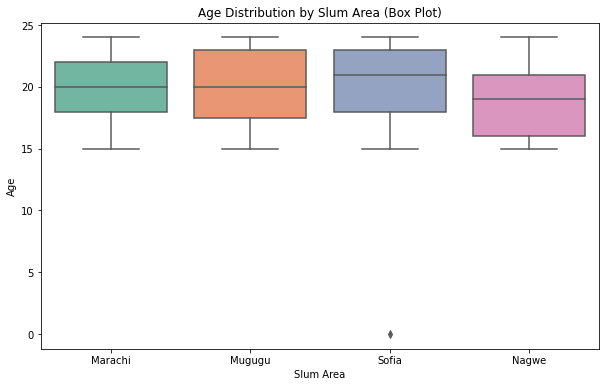

In [20]:
# Define a custom color palette for the box plot
custom_palette = sns.color_palette("Set2")

# Create the box plot for age distribution by slum area
plt.figure(figsize=(10, 6))
sns.boxplot(x='Q128', y='A2', data=data, palette=custom_palette)
plt.xlabel('Slum Area')
plt.ylabel('Age')
plt.title('Age Distribution by Slum Area (Box Plot)')
plt.show()

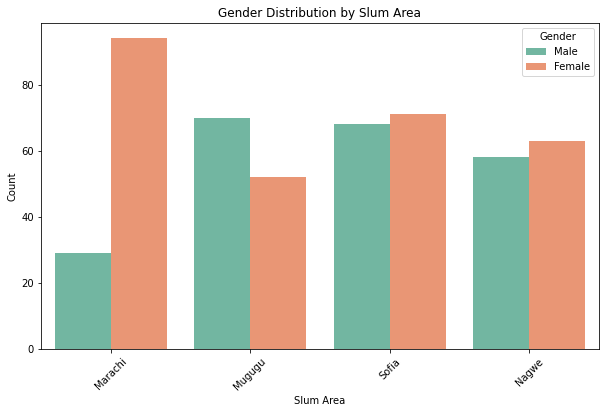

In [14]:
data['A2'] = data['A2'].fillna(0).astype(int)

# Define a custom color palette for the bar plot
custom_palette = sns.color_palette("Set2")

# Plot bar graph for gender distribution by slum area
plt.figure(figsize=(10, 6))
sns.countplot(x='Q128', hue='A1', data=data, palette=custom_palette)
plt.xlabel('Slum Area')
plt.ylabel('Count')
plt.title('Gender Distribution by Slum Area')
plt.legend(title='Gender', labels=['Male', 'Female'])  # Custom legend labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

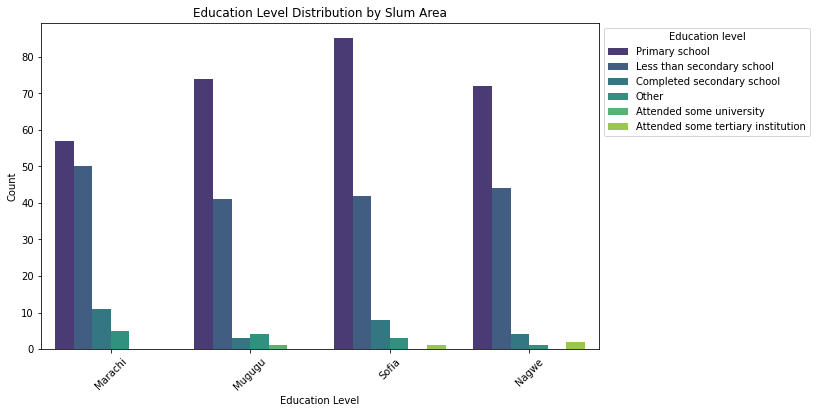

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Q128', hue='A3', data=data, palette='viridis')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution by Slum Area')
#plt.legend(title='Slum Area', loc='upper right')
plt.legend(title='Education level', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

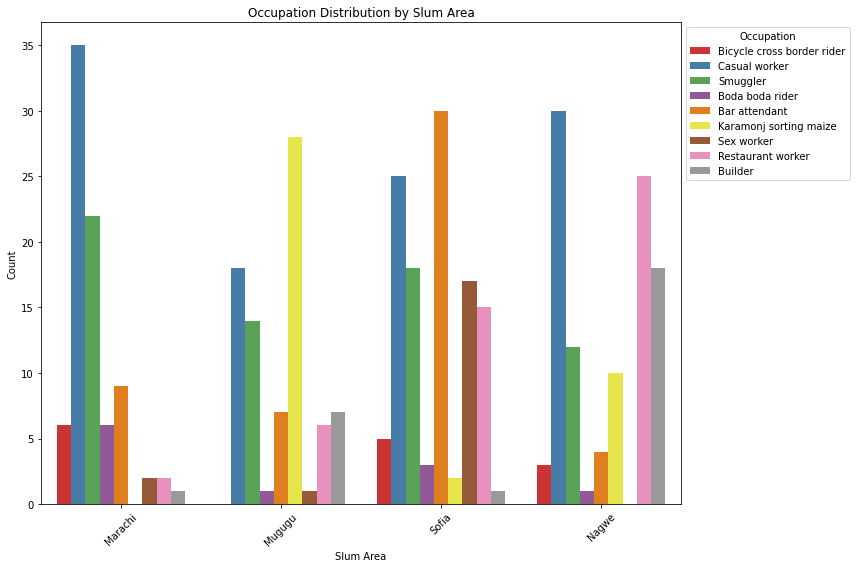

In [16]:
# Plot bar graph for occupation distribution by slum area
plt.figure(figsize=(12, 8))
sns.countplot(x='Q128', hue='A6', data=data, palette='Set1')
plt.xlabel('Slum Area')
plt.ylabel('Count')
plt.title('Occupation Distribution by Slum Area')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

#legend outside the plot area
plt.legend(title='Occupation', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.tight_layout()  # Adjust plot layout to prevent overlapping

plt.show()

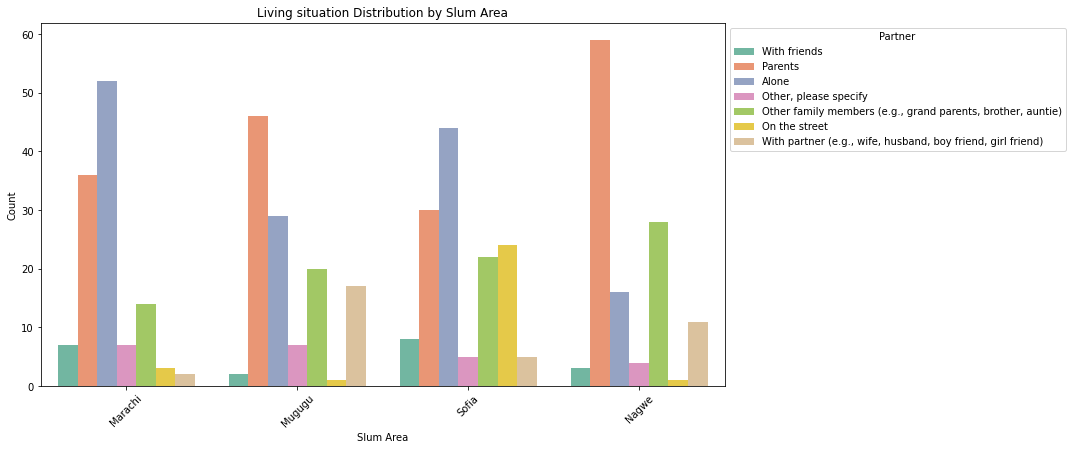

In [30]:
# Plot count plot for gender distribution by slum area
plt.figure(figsize=(15, 6))
sns.countplot(x='Q128', hue='A4', data=data, palette='Set2')
plt.xlabel('Slum Area')
plt.ylabel('Count')
plt.title('Living situation Distribution by Slum Area')
#plt.legend(title='Gender')

#legend outside the plot area
plt.legend(title='Partner', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.tight_layout()  # Adjust plot layout to prevent overlapping


plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

### Mental Health Plots

<Figure size 864x576 with 0 Axes>

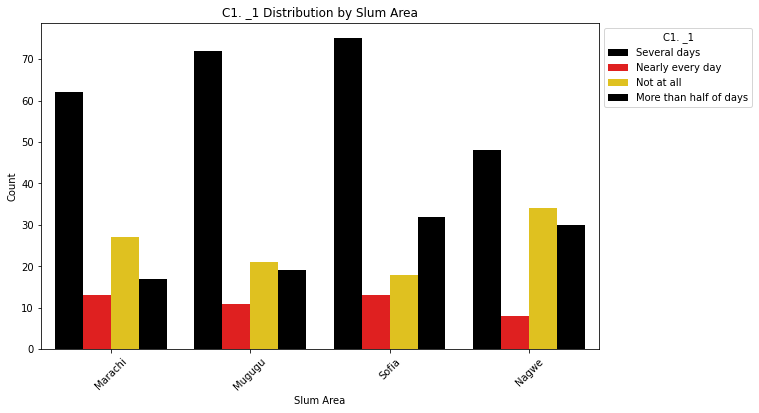

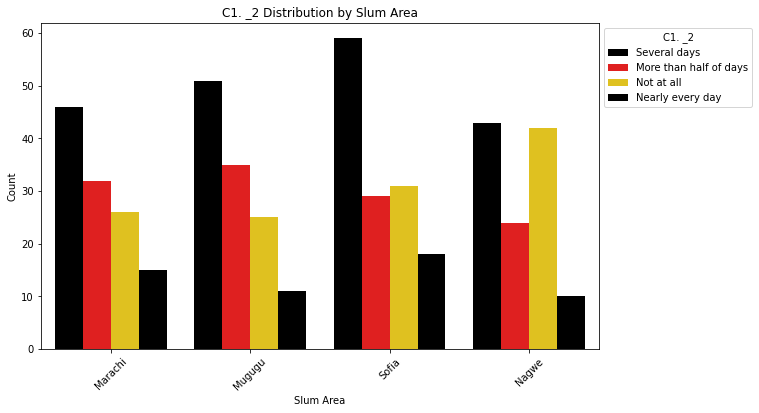

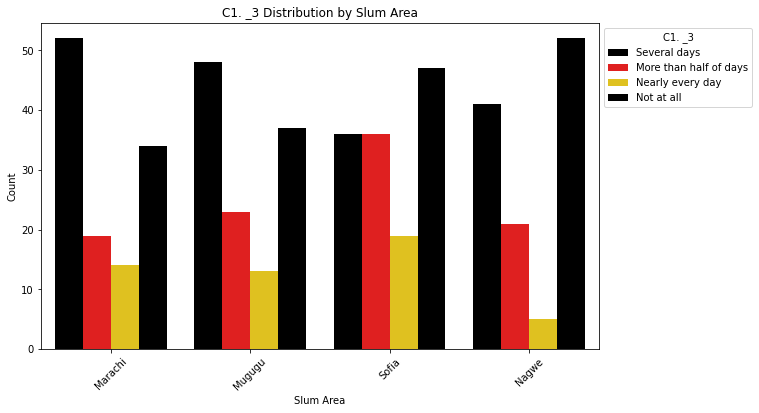

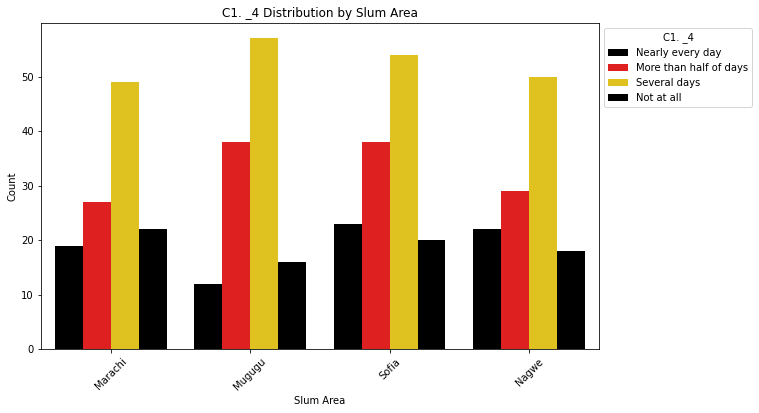

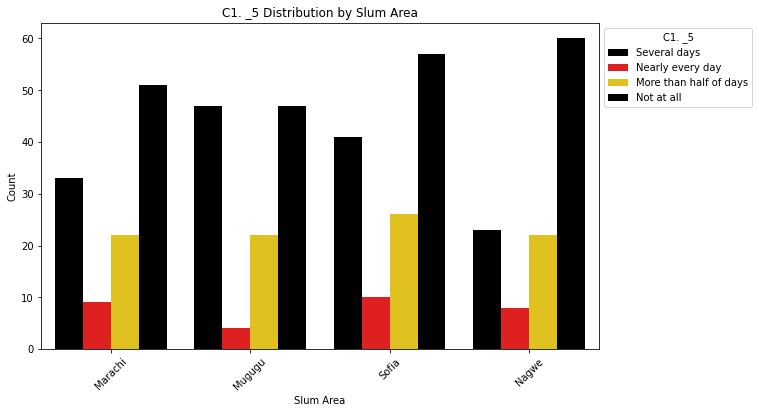

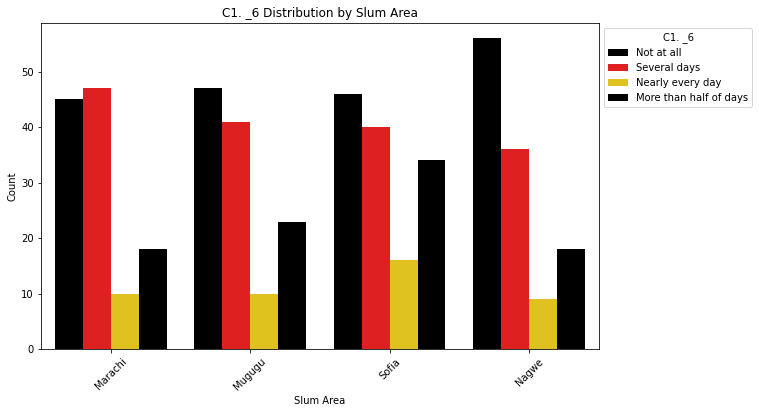

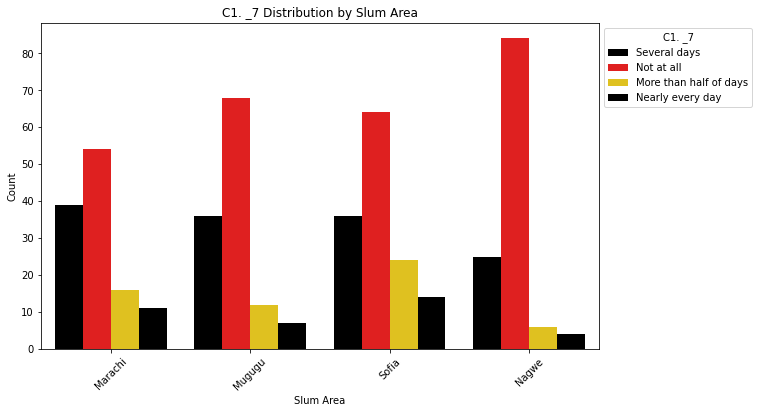

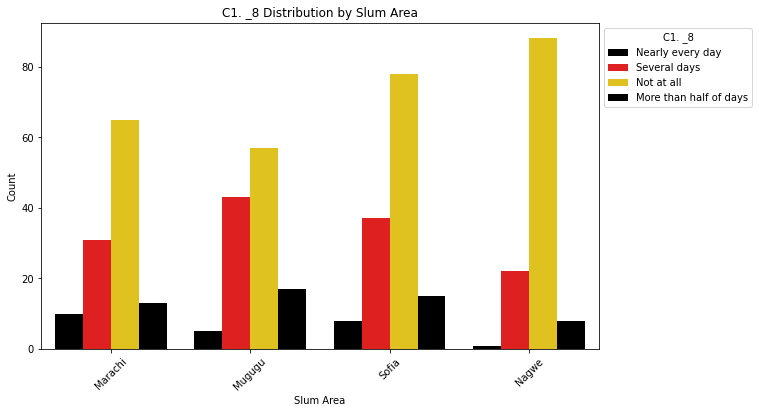

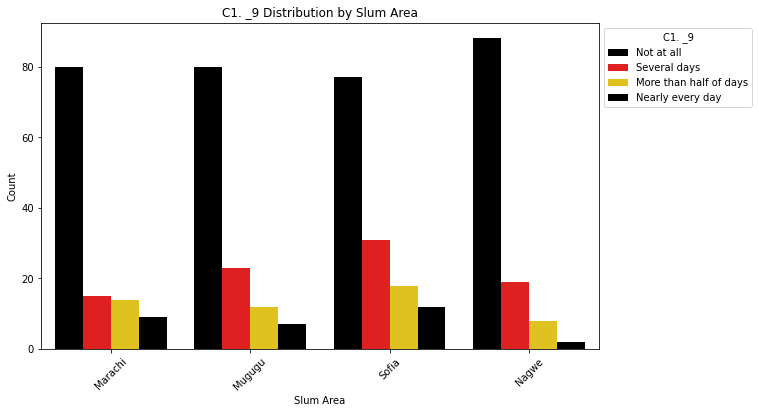

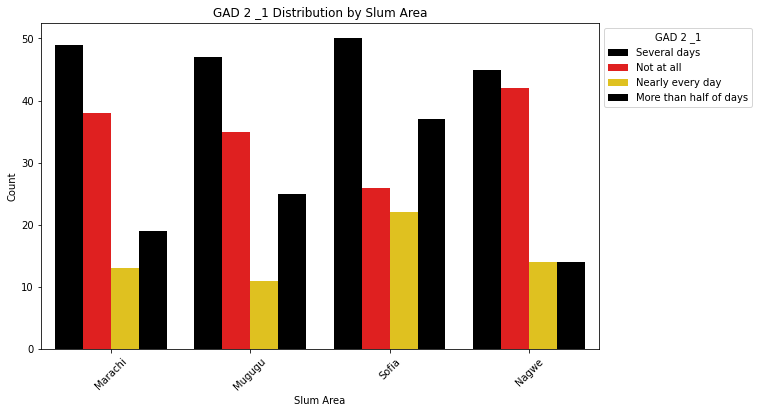

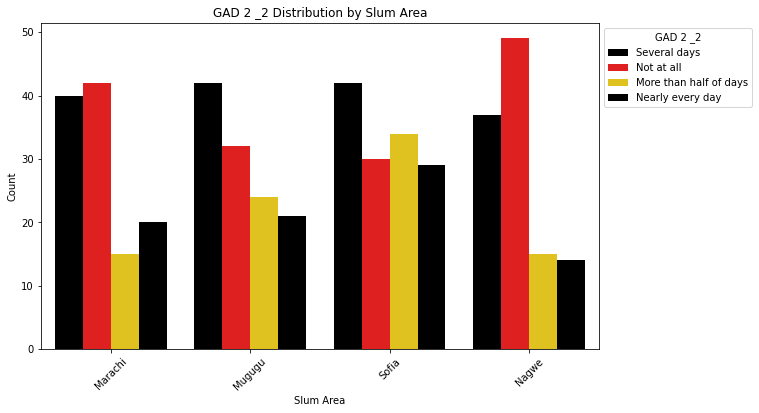

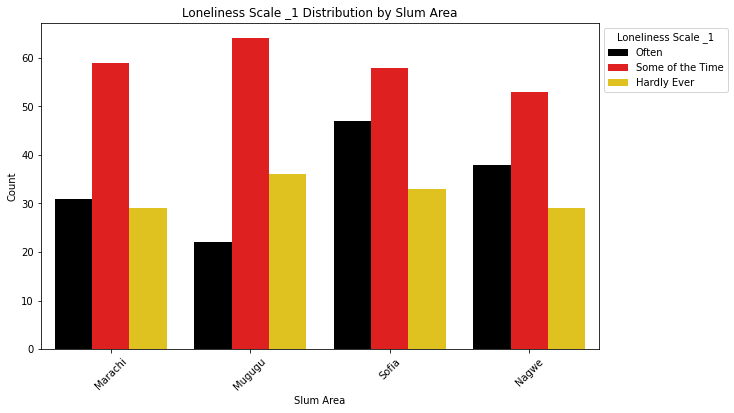

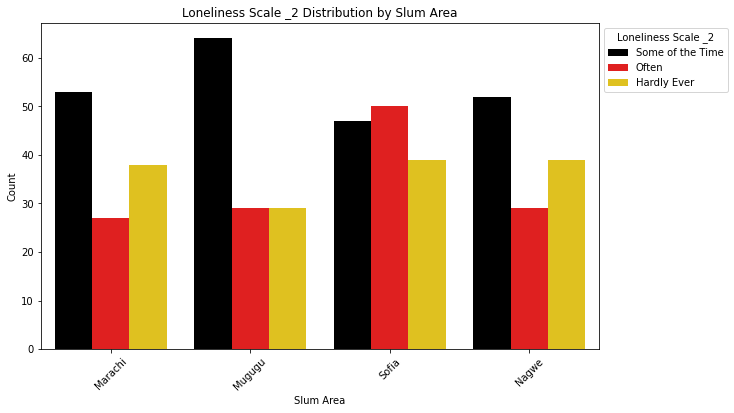

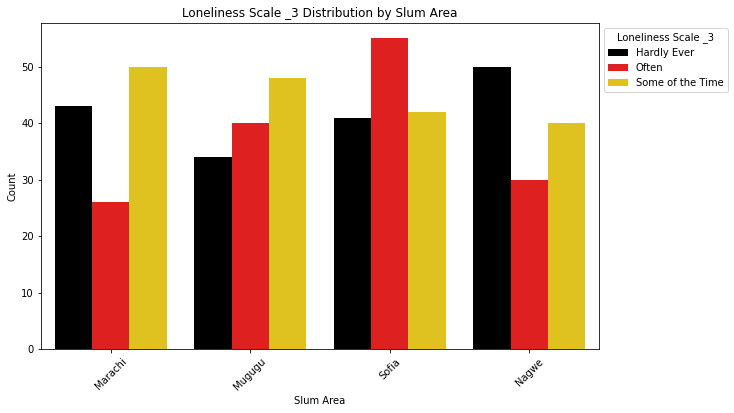

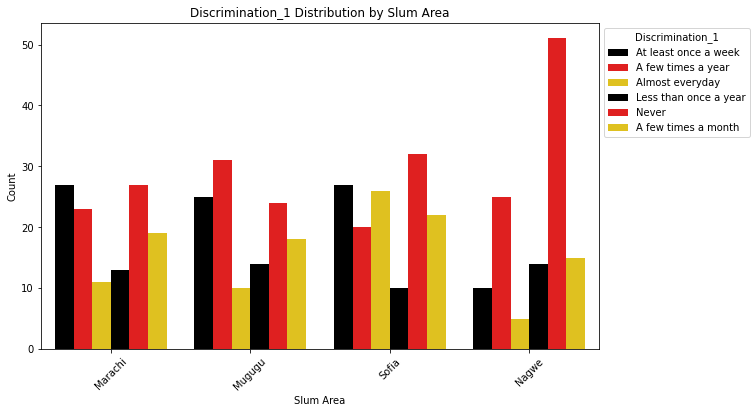

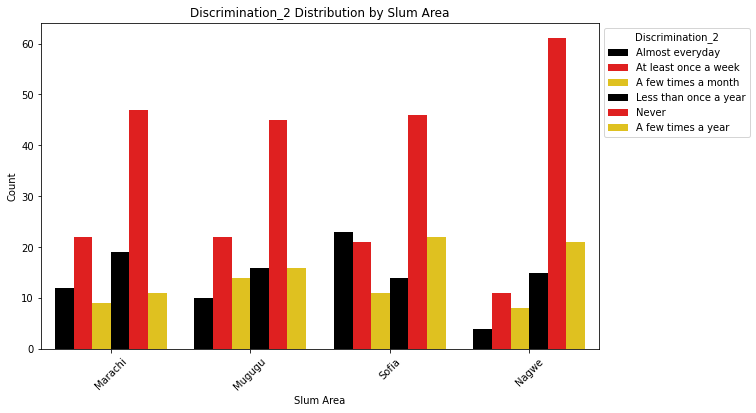

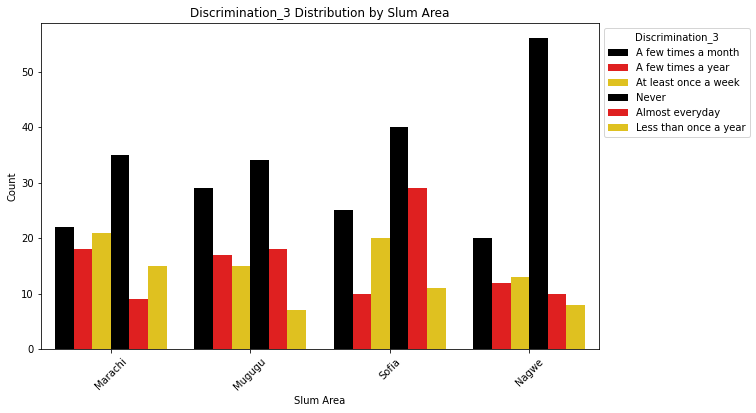

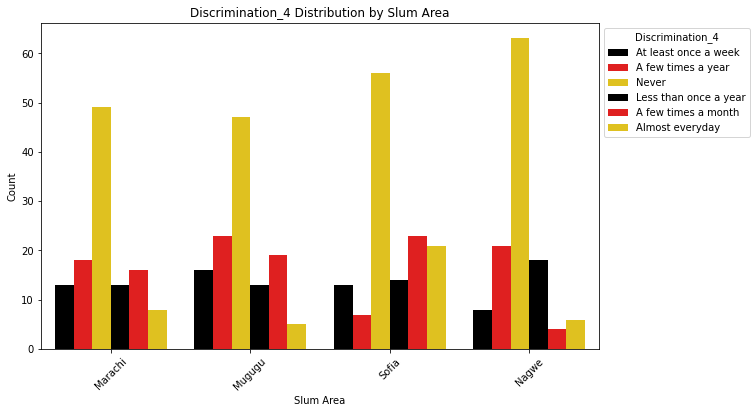

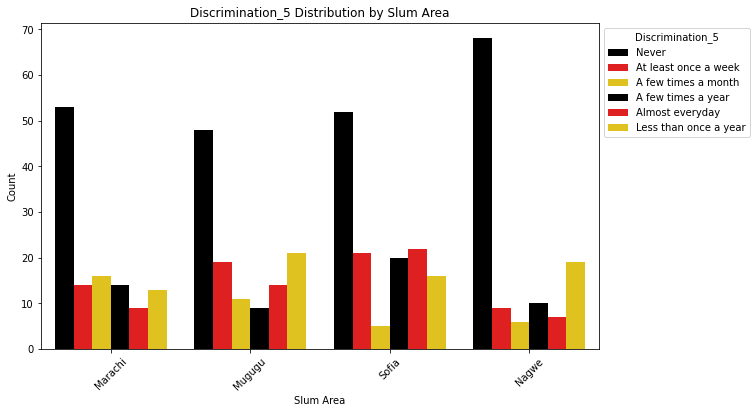

In [18]:

# List of mental health question codes to plot
mental_health_questions = ['C1. _1', 'C1. _2', 'C1. _3', 'C1. _4', 'C1. _5', 'C1. _6', 'C1. _7', 'C1. _8', 'C1. _9', 
                            'GAD 2 _1', 'GAD 2 _2', 'Loneliness Scale _1', 'Loneliness Scale _2', 'Loneliness Scale _3',
                            'Discrimination_1', 'Discrimination_2', 'Discrimination_3', 'Discrimination_4', 'Discrimination_5']

custom_palette = ["black", "red", "gold"]

# Plot count plot for each mental health question against slum area
plt.figure(figsize=(12, 8))
for question in mental_health_questions:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Q128', hue=question, data=data, palette=custom_palette)
    plt.xlabel('Slum Area')
    plt.ylabel('Count')
    plt.title(f'{question} Distribution by Slum Area')
#     plt.legend(title=question)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    
    #legend outside the plot area
    plt.legend(title=question, loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    
    plt.show()


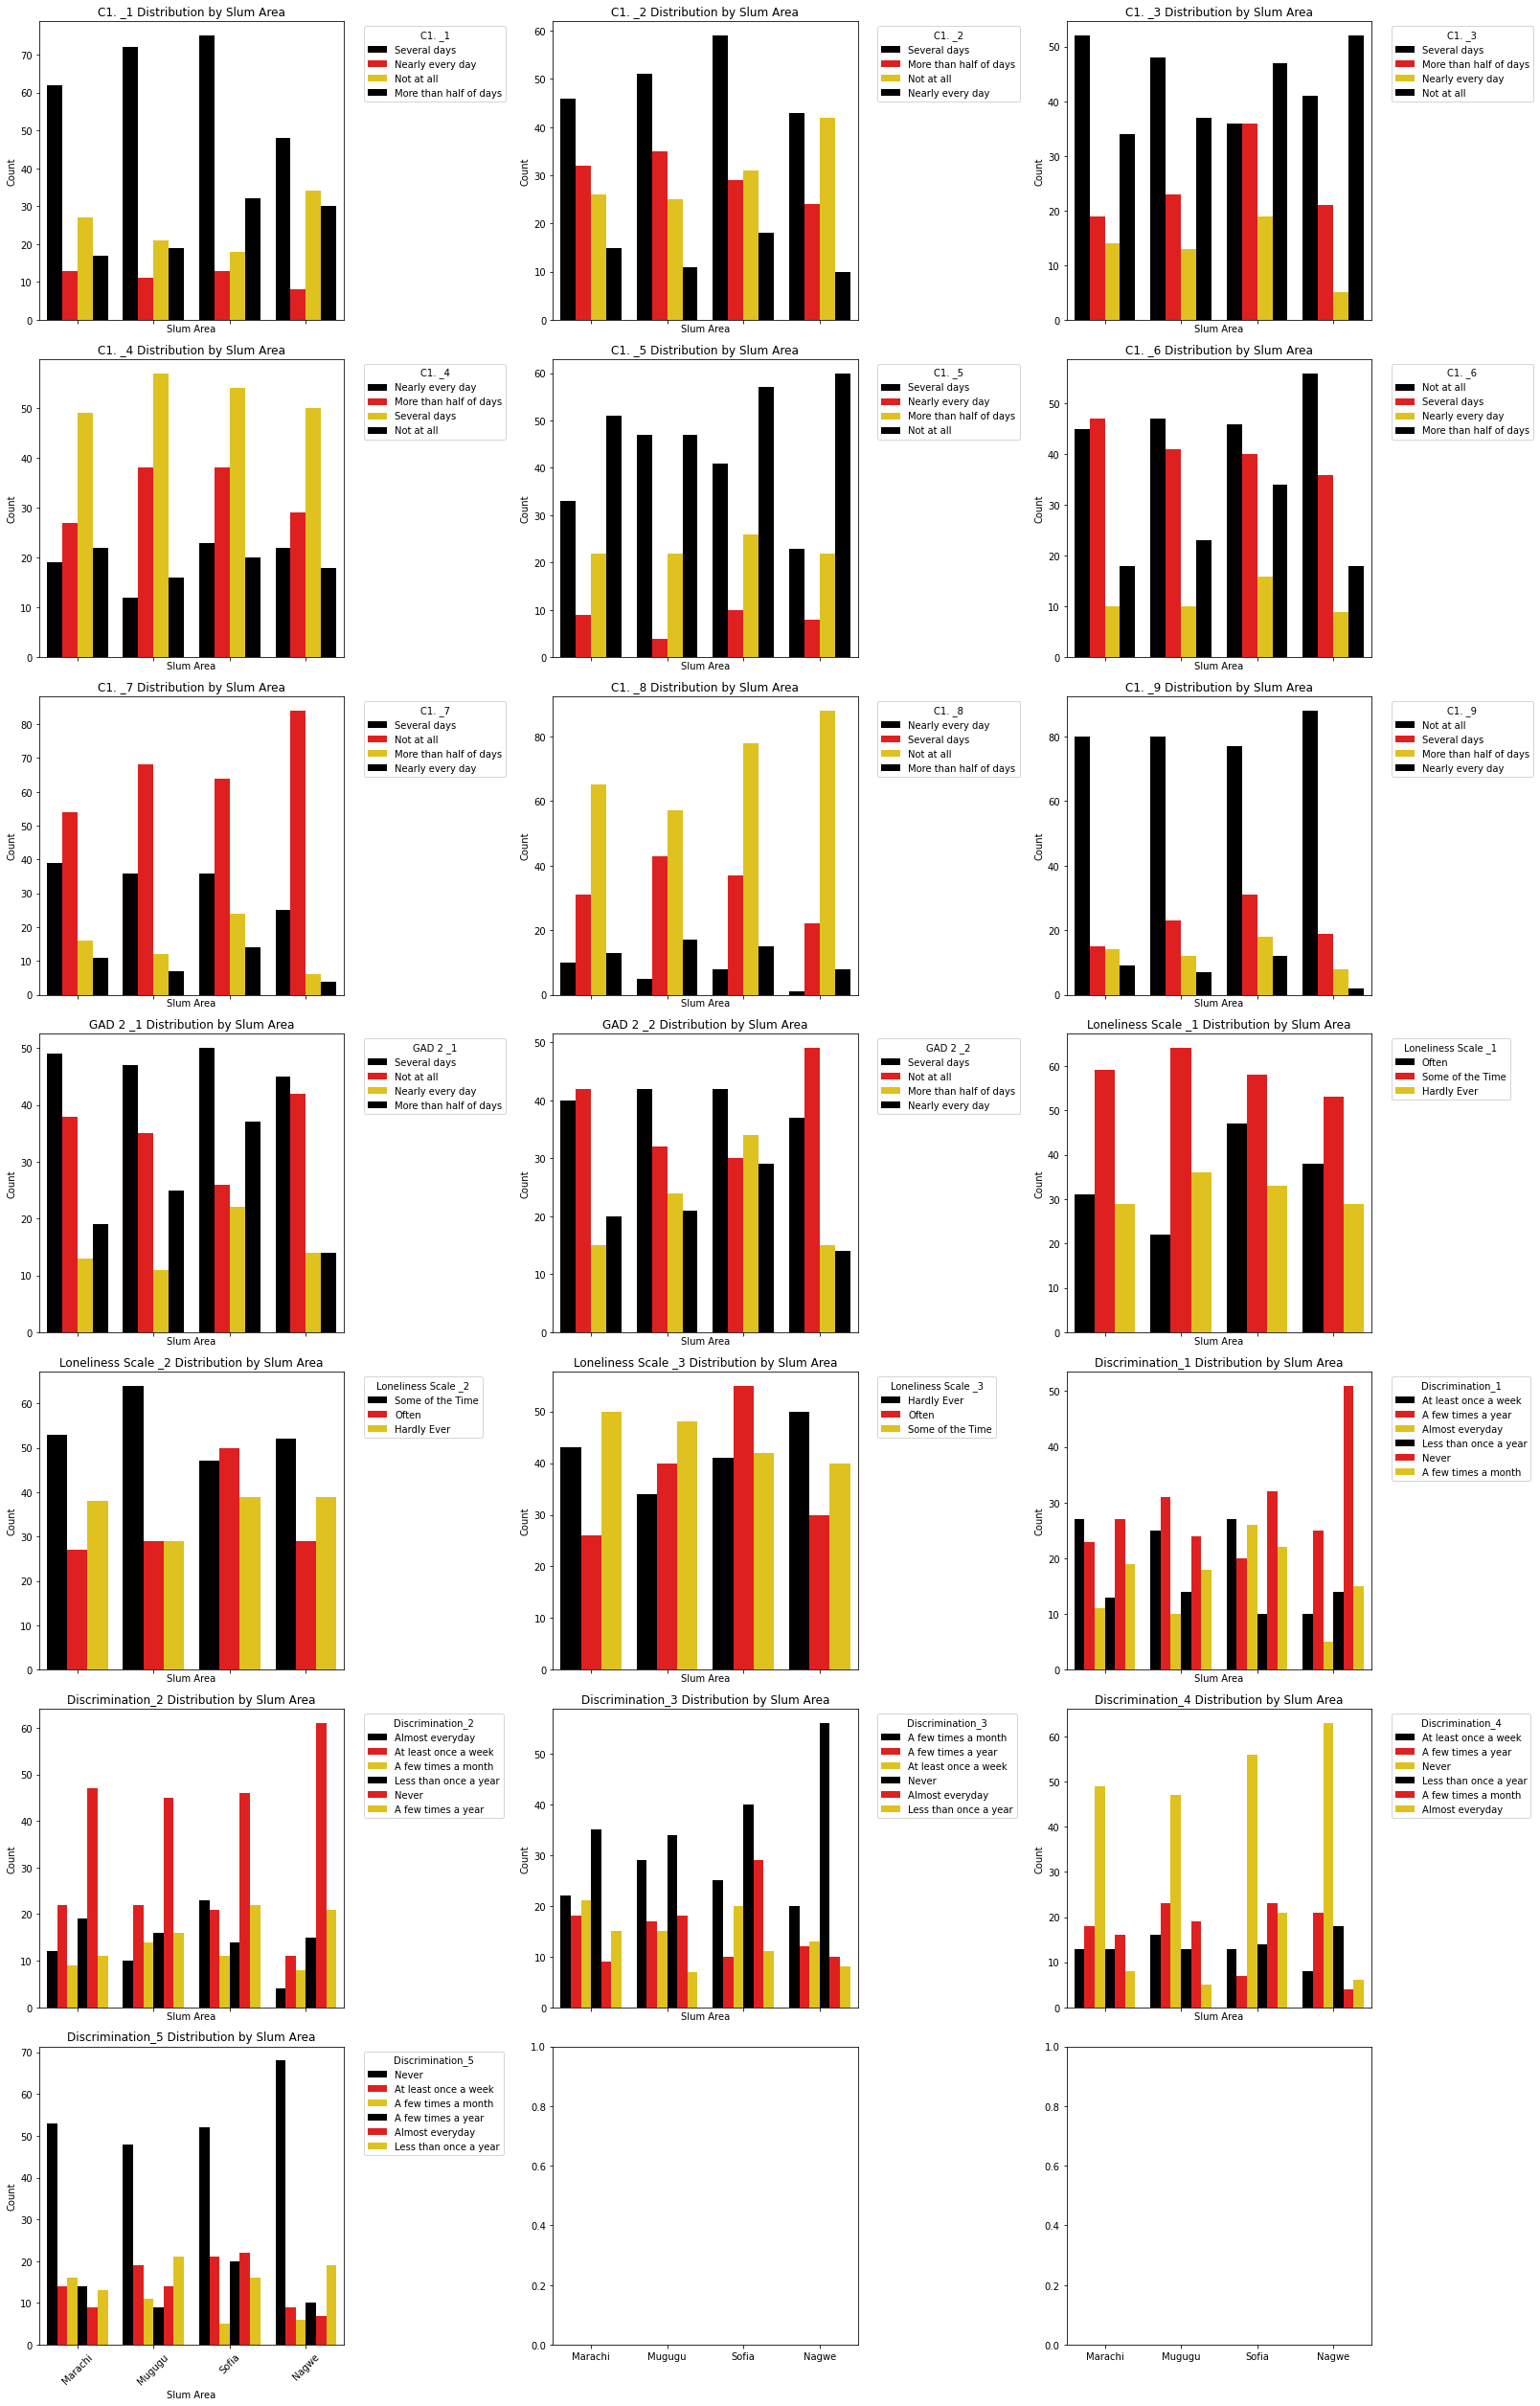

In [25]:
# Define custom color palette with black, red, and yellow/gold colors
custom_palette = ["black", "red", "gold"]

# Assuming 'data' is your DataFrame
# Replace 'slum' with the actual column name containing slum area information

# List of mental health question codes to plot
mental_health_questions = ['C1. _1', 'C1. _2', 'C1. _3', 'C1. _4', 'C1. _5', 'C1. _6', 'C1. _7', 'C1. _8', 'C1. _9', 
                            'GAD 2 _1', 'GAD 2 _2', 'Loneliness Scale _1', 'Loneliness Scale _2', 'Loneliness Scale _3',
                            'Discrimination_1', 'Discrimination_2', 'Discrimination_3', 'Discrimination_4', 'Discrimination_5']

# Calculate the number of rows and columns needed
num_plots = len(mental_health_questions)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Ceiling division to ensure enough rows for all plots

# Create subplots for each mental health question against slum area
fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows), sharex=True)

for idx, question in enumerate(mental_health_questions):
    row_idx = idx // num_cols  # Calculate the row index for the subplot
    col_idx = idx % num_cols  # Calculate the column index for the subplot
    sns.countplot(x='Q128', hue=question, data=data, palette=custom_palette, ax=axs[row_idx, col_idx])
    axs[row_idx, col_idx].set_xlabel('Slum Area')
    axs[row_idx, col_idx].set_ylabel('Count')
    axs[row_idx, col_idx].set_title(f'{question} Distribution by Slum Area')
    axs[row_idx, col_idx].legend(title=question, bbox_to_anchor=(1.05, 1), loc='upper left')
    axs[row_idx, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the padding to prevent tick labels from getting cut off
plt.show()

In [ ]:
pip install jupyter-collaboration

##  Age and Mental Health:
1. Is there a correlation between age and stress levels, anxiety, or depression?
2. Do different age groups experience varying levels of mental distress?

##  Gender and Mental Health:
1. Are there gender differences in mental health outcomes?
2. Do men and women report similar levels of stress, anxiety, and depression?

##  Education Level and Mental Health:
1. How does education level relate to mental well-being?
2. Are individuals with higher education less likely to experience mental health issues?

##  Household Composition and Mental Health:
1. Does living in a larger household (e.g., with extended family) impact mental health?
2. Are individuals living alone more susceptible to stress or depression?

##  Income and Mental Health:
1. Is there an association between income sources (e.g., stable employment, irregular income) and mental health?
2. How do coping mechanisms during economic challenges affect mental well-being?

## Social Support and Mental Health:
1. Does having strong social support networks correlate with lower stress levels or better mental health?
2. Are respondents with more emotional and practical support less likely to experience anxiety or depression?

## Access to Mental Health Services:
1. How does awareness of mental health services impact mental health outcomes?
2. Are individuals who have access to professional help reporting better mental well-being?


In [36]:

# Count unique values for depression severity columns
depression_counts = data[['C1. _1', 'C1. _2', 'C1. _3', 'C1. _4', 'C1. _5', 'C1. _6', 'C1. _7', 'C1. _8', 'C1. _9']].apply(pd.value_counts)
print("Value Counts for Depression Severity:")
print(depression_counts)

# Count unique values for generalized anxiety disorder columns
gad_counts = data[['GAD 2 _1', 'GAD 2 _2']].apply(pd.value_counts)
print("\nValue Counts for Generalized Anxiety Disorder:")
print(gad_counts)

# Count unique values for loneliness scale columns
loneliness_counts = data[['Loneliness Scale _1', 'Loneliness Scale _2', 'Loneliness Scale _3']].apply(pd.value_counts)
print("\nValue Counts for Loneliness Scale:")
print(loneliness_counts)

# Count unique values for social support columns
social_support_counts = data[['Social Support_1', 'Social Support_2', 'Social Support_3', 'Social Support_4', 'Social Support_5', 'Social Support_6', 'Social Support_7', 'Social Support_8']].apply(pd.value_counts)
print("\nValue Counts for Social Support:")
print(social_support_counts)

# # Count unique values for flourishing scale columns
# flourishing_counts = data[['C27.Flourishing _1', 'C27.Flourishing _2', 'C27.Flourishing _3', 'C27.Flourishing _4', 'C27.Flourishing _5', 'C27.Flourishing _6', 'C27.Flourishing _7', 'C27.Flourishing _8']].apply(pd.value_counts)
# print("\nValue Counts for Flourishing Scale:")
# print(flourishing_counts)

# Count unique values for discrimination columns
discrimination_counts = data[['Discrimination_1', 'Discrimination_2', 'Discrimination_3', 'Discrimination_4', 'Discrimination_5']].apply(pd.value_counts)
print("\nValue Counts for Discrimination:")
print(discrimination_counts)

Value Counts for Depression Severity:
                        C1. _1  C1. _2  C1. _3  C1. _4  C1. _5  C1. _6  \
More than half of days      99     120     100     132      92      93   
Nearly every day            45      54      51      76      31      45   
Not at all                 101     127     173      79     218     197   
Several days               260     201     178     211     145     165   

                        C1. _7  C1. _8  C1. _9  
More than half of days      58      53      52  
Nearly every day            36      24      30  
Not at all                 273     292     329  
Several days               137     133      88  

Value Counts for Generalized Anxiety Disorder:
                        GAD 2 _1  GAD 2 _2
Several days                 192       161
Not at all                   144       157
More than half of days        95        88
Nearly every day              60        84

Value Counts for Loneliness Scale:
                  Loneliness Scale _1  Loneline

In [38]:
# Define the mental health question sets and their corresponding columns
mental_health_sets = {
    'Depression Severity (PHQ-9)': ['C1. _1', 'C1. _2', 'C1. _3', 'C1. _4', 'C1. _5', 'C1. _6', 'C1. _7', 'C1. _8', 'C1. _9'],
    'Generalized Anxiety Disorder (GAD-2)': ['GAD 2 _1', 'GAD 2 _2'],
    'Loneliness Scale': ['Loneliness Scale _1', 'Loneliness Scale _2', 'Loneliness Scale _3'],
    'Social Support (mMOS-SS) Scale': ['Social Support_1', 'Social Support_2', 'Social Support_3',
                                       'Social Support_4', 'Social Support_5', 'Social Support_6',
                                       'Social Support_7', 'Social Support_8'],
#     'Psychological Well-being (Flourishing Scale)': ['C27.Flourishing _1', 'C27.Flourishing _2', 'C27.Flourishing _3',
#                                                       'C27.Flourishing _4', 'C27.Flourishing _5', 'C27.Flourishing _6',
#                                                       'C27.Flourishing _7', 'C27.Flourishing _8'],
    'Everyday Discrimination Scale': ['Discrimination_1', 'Discrimination_2', 'Discrimination_3',
                                      'Discrimination_4', 'Discrimination_5']
}

# Calculate descriptive statistics for each mental health question set
mental_health_stats = {}
for set_name, columns in mental_health_sets.items():
    mental_health_stats[set_name] = data[columns].describe()
    

    
# Display descriptive statistics for each mental health question set
for set_name, stats in mental_health_stats.items():
    print(f"\nDescriptive Statistics for {set_name}:")
    print(stats)


Descriptive Statistics for Depression Severity (PHQ-9):
              C1. _1        C1. _2        C1. _3        C1. _4      C1. _5  \
count            505           502           502           498         486   
unique             4             4             4             4           4   
top     Several days  Several days  Several days  Several days  Not at all   
freq             260           201           178           211         218   

            C1. _6      C1. _7      C1. _8      C1. _9  
count          500         504         502         499  
unique           4           4           4           4  
top     Not at all  Not at all  Not at all  Not at all  
freq           197         273         292         329  

Descriptive Statistics for Generalized Anxiety Disorder (GAD-2):
            GAD 2 _1      GAD 2 _2
count            491           490
unique             4             4
top     Several days  Several days
freq             192           161

Descriptive Statistics fo

## Age and Mental Health:

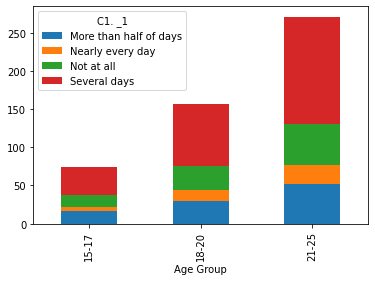

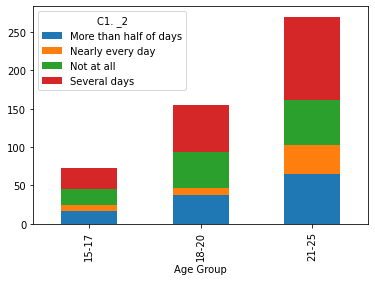

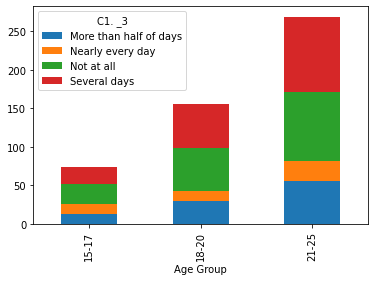

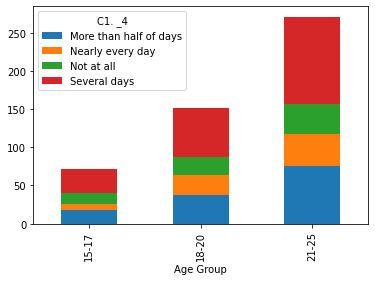

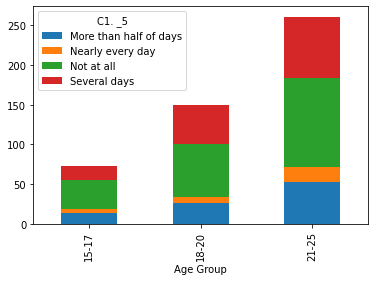

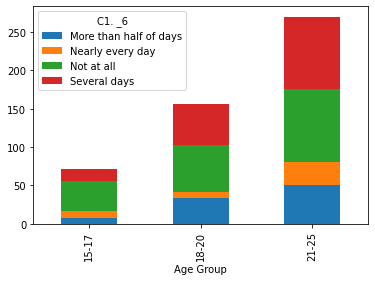

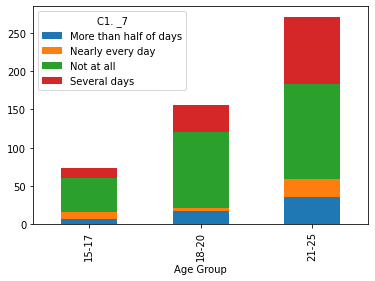

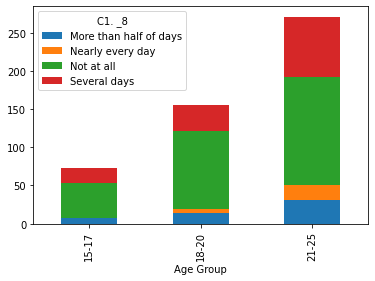

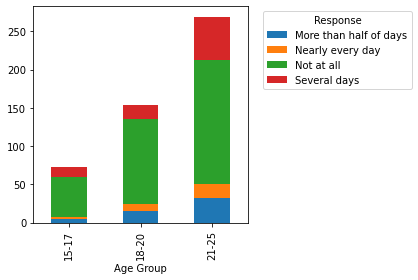

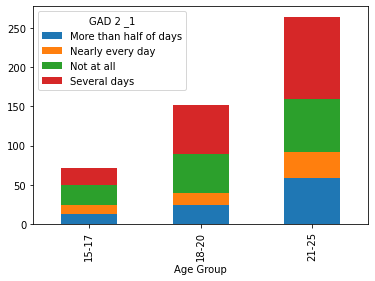

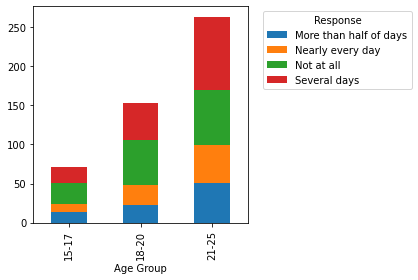

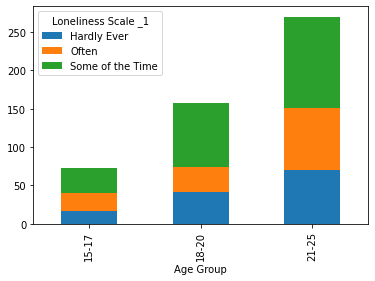

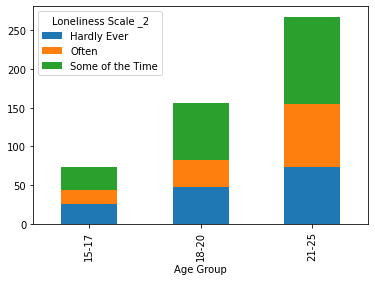

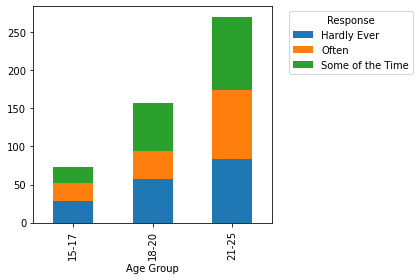

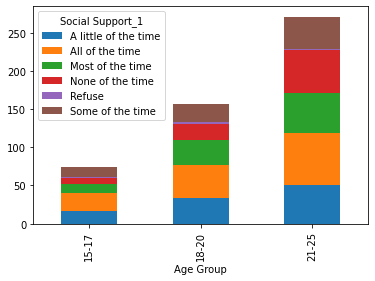

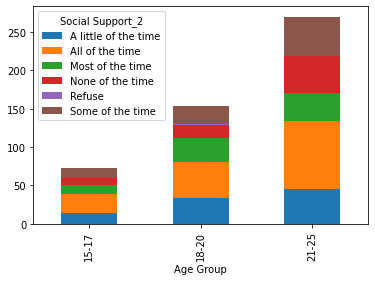

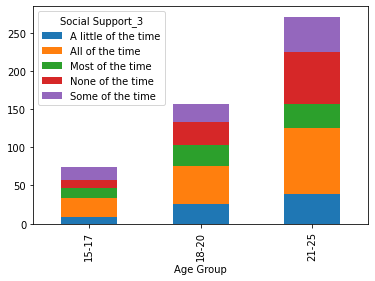

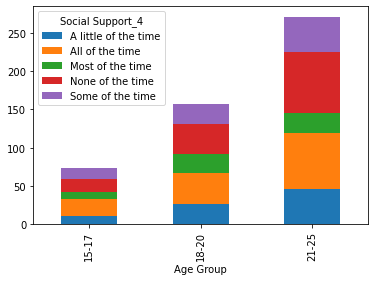

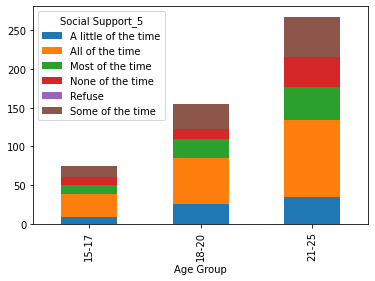

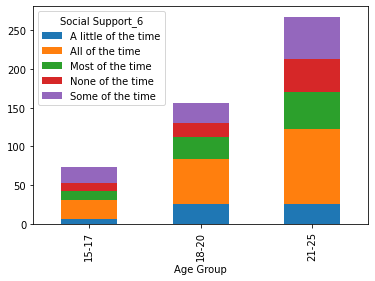

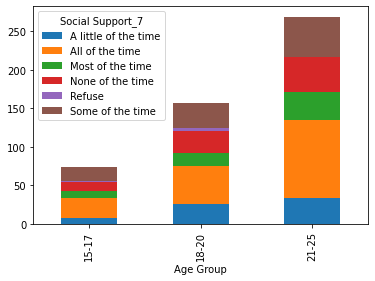

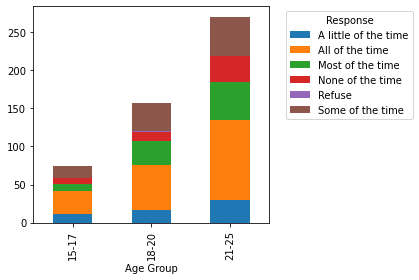

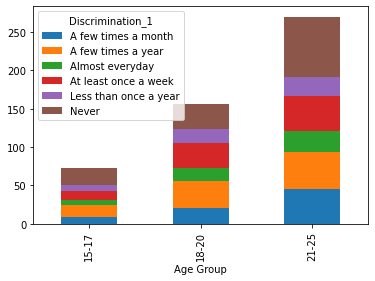

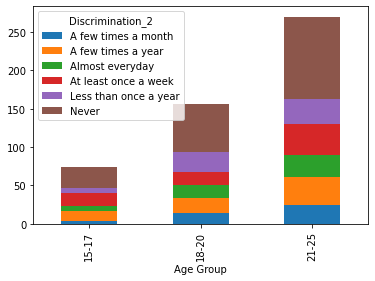

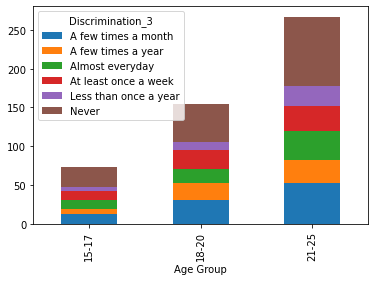

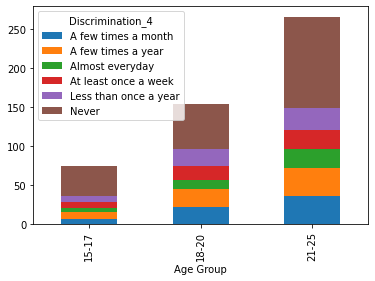

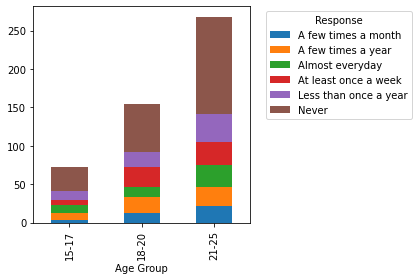

In [65]:
data['A2'] = pd.to_numeric(data['A2'], errors='coerce')  # Coerce errors to NaN for non-numeric values

# Remove rows with NaN values in 'A2' column
data = data.dropna(subset=['A2'])

# Now, create age group bins with the updated 'A2' column
bins = [15, 17, 20, 25]  # Define your age group bins as needed
labels = ['15-17', '18-20', '21-25']  # Labels for age groups
data['Age Group'] = pd.cut(data['A2'], bins=bins, labels=labels, right=False)

# Define dictionaries/lists for each mental health indicator scale
depression_columns = ['C1. _1', 'C1. _2', 'C1. _3', 'C1. _4', 'C1. _5', 'C1. _6', 'C1. _7', 'C1. _8', 'C1. _9']
anxiety_columns = ['GAD 2 _1', 'GAD 2 _2']
loneliness_columns = ['Loneliness Scale _1', 'Loneliness Scale _2', 'Loneliness Scale _3']
social_support_columns = ['Social Support_1', 'Social Support_2', 'Social Support_3', 'Social Support_4', 
                         'Social Support_5', 'Social Support_6', 'Social Support_7', 'Social Support_8']
# psychological_wellbeing_columns = ['Flourishing _1', 'Flourishing _2', 'Flourishing _3', 'Flourishing _4', 
#                                    'Flourishing _5', 'Flourishing _6', 'Flourishing _7', 'Flourishing _8']
discrimination_columns = ['Discrimination_1', 'Discrimination_2', 'Discrimination_3', 'Discrimination_4', 'Discrimination_5']

# Create a dictionary to map each mental health indicator to its corresponding columns
mental_health_mapping = {
    'Depression': depression_columns,
    'Anxiety': anxiety_columns,
    'Loneliness': loneliness_columns,
    'Social Support': social_support_columns,
#     'Psychological Well-being': psychological_wellbeing_columns,
    'Discrimination': discrimination_columns
}

# Group data by age group and calculate value counts for each mental health indicator
age_grouped_data = data.groupby('Age Group')
value_counts = {}
for indicator, columns in mental_health_mapping.items():
    counts = {}
    for col in columns:
        counts[col] = age_grouped_data[col].value_counts().unstack().fillna(0)
    value_counts[indicator] = counts

# Plotting stacked bar charts for each mental health indicator
for indicator, counts_dict in value_counts.items():
# #     plt.figure(figsize=(12, 10))
#     plt.title(f'{indicator} Value Counts by Age Group')
#     plt.xlabel('Age Group')
#     plt.ylabel('Counts')
    for col, counts_df in counts_dict.items():
        counts_df.plot(kind='bar', stacked=True, label=col)
    plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Gender and Mental health

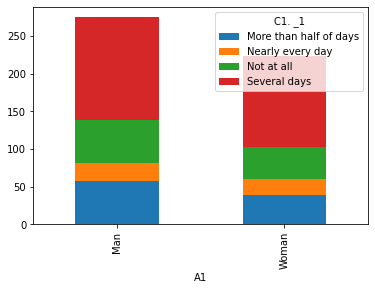

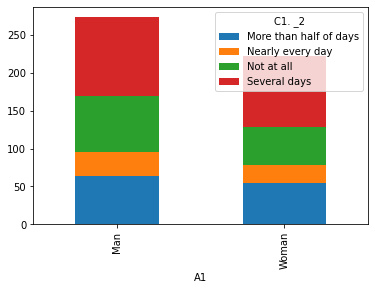

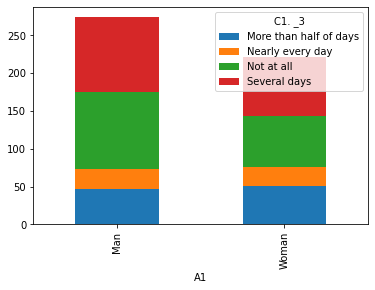

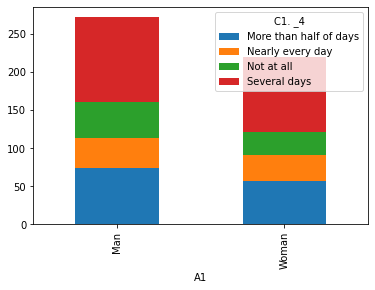

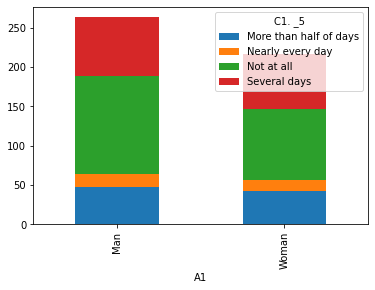

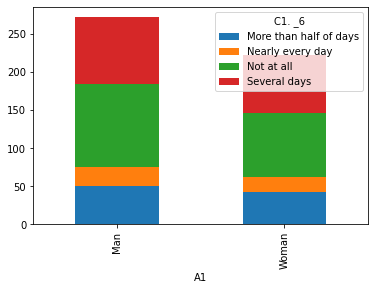

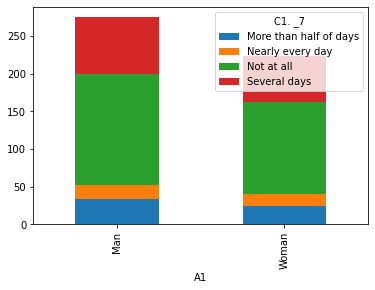

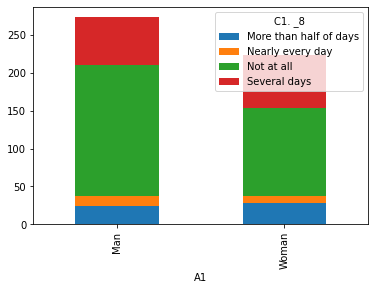

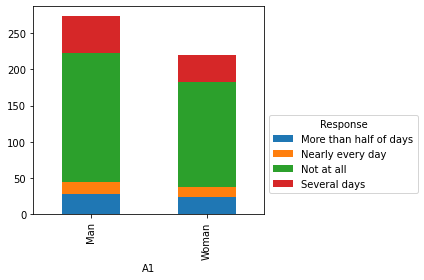

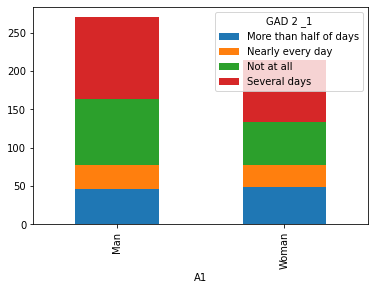

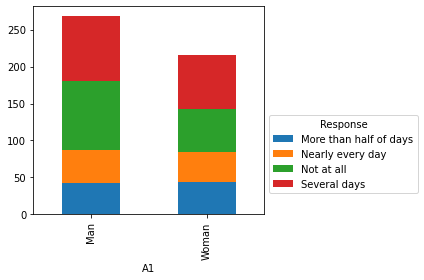

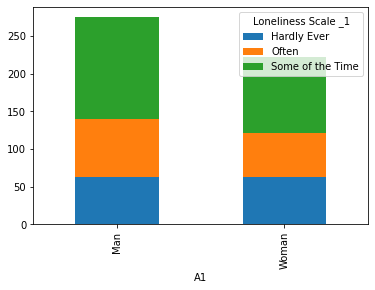

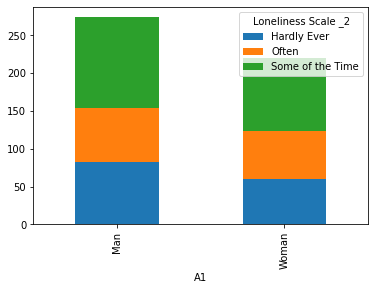

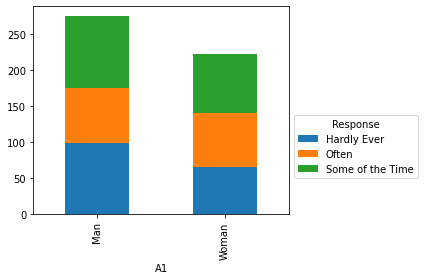

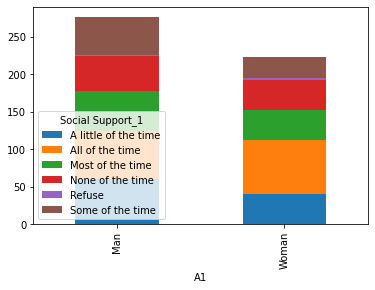

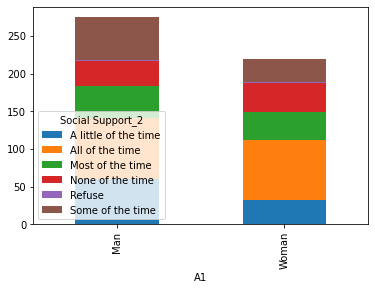

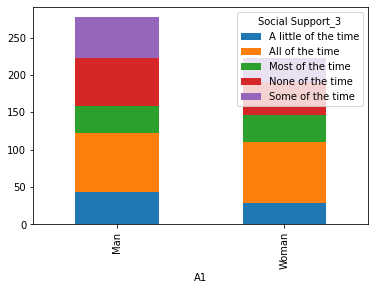

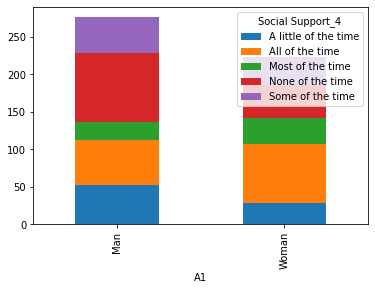

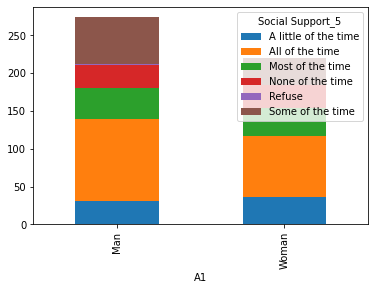

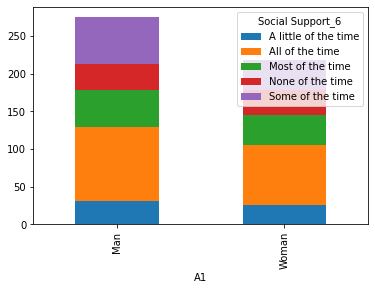

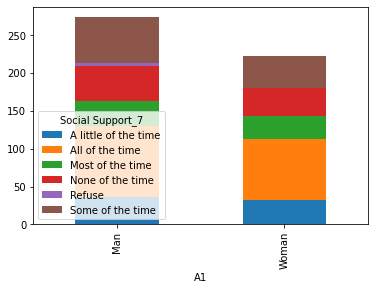

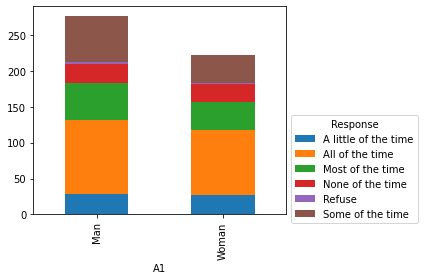

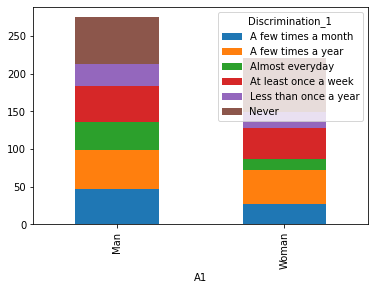

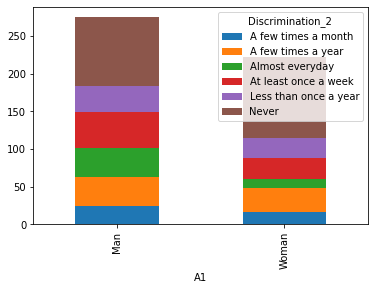

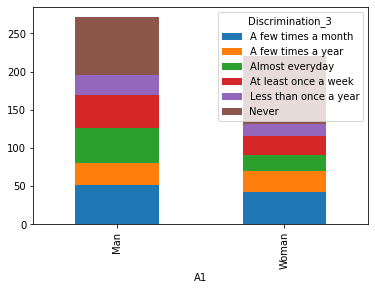

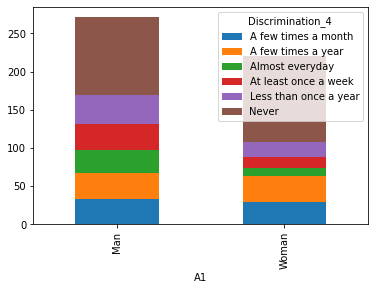

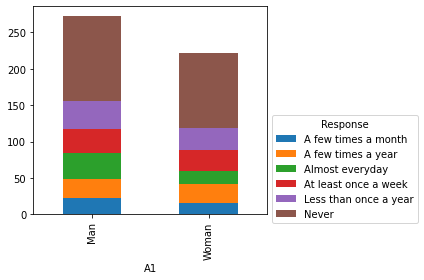

In [76]:
# Define dictionaries/lists for each mental health indicator scale
depression_columns = ['C1. _1', 'C1. _2', 'C1. _3', 'C1. _4', 'C1. _5', 'C1. _6', 'C1. _7', 'C1. _8', 'C1. _9']
anxiety_columns = ['GAD 2 _1', 'GAD 2 _2']
loneliness_columns = ['Loneliness Scale _1', 'Loneliness Scale _2', 'Loneliness Scale _3']
social_support_columns = ['Social Support_1', 'Social Support_2', 'Social Support_3', 'Social Support_4', 
                         'Social Support_5', 'Social Support_6', 'Social Support_7', 'Social Support_8']
# psychological_wellbeing_columns = ['Flourishing _1', 'Flourishing _2', 'Flourishing _3', 'Flourishing _4', 
#                                    'Flourishing _5', 'Flourishing _6', 'Flourishing _7', 'Flourishing _8']
discrimination_columns = ['Discrimination_1', 'Discrimination_2', 'Discrimination_3', 'Discrimination_4', 'Discrimination_5']

# Create a dictionary to map each mental health indicator to its corresponding columns
mental_health_mapping = {
    'Depression': depression_columns,
    'Anxiety': anxiety_columns,
    'Loneliness': loneliness_columns,
    'Social Support': social_support_columns,
#     'Psychological Well-being': psychological_wellbeing_columns,
    'Discrimination': discrimination_columns
}

# Group data by gender and calculate value counts for each mental health indicator
gender_grouped_data = data.groupby('A1')
counts_dict = {}
for indicator, columns in mental_health_mapping.items():
    counts = {}
    for col in columns:
        counts[col] = gender_grouped_data[col].value_counts().unstack().fillna(0)
    value_counts[indicator] = counts
    
# Plotting
for indicator, counts_dict in value_counts.items():
# #     plt.figure(figsize=(12, 10))
#     plt.title(f'{indicator} Value Counts by Age Group')
#     plt.xlabel('Gender')
#     plt.ylabel('Counts')
    for col, counts_df in counts_dict.items():
        counts_df.plot(kind='bar', stacked=True, label=col)
    plt.legend(title='Response', loc='best', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

In [81]:
file = '/Users/sanmilralkar/Downloads/Clean_Twendee_Data (April 5, 2024).dta'

In [82]:
df = pd.read_stata(file)

/Users/sanmilralkar/opt/anaconda3/lib/python3.9/site-packages/pandas/io/stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [83]:
df

,Q129,Q127,slums,woman,age,agegroup,education,l_arrgmnt,employment,job_type,...,G__1,G__2,G__3,G__4,G__5,G__6,Q139,Q150,Total_eMeal,m_eMeal
0,04,Mg02,Mugugu,Man,21.0,Young adults,Completed primary,Parent,Unemployed,NaN,...,Never,Seldom (1-2 times),Never,Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),,,8.0,1.000
1,06,NG407,Nagwe,Man,20.0,Young adults,Some secondary,Relative,Part-time,causal work,...,Never,Never,Never,Never,Never,Never,0753151485,N/A,24.0,3.000
2,01,S07,Sofia,Man,22.0,Young adults,Completed primary,Alone,Part-time,causal work,...,NaN,NaN,NaN,NaN,NaN,NaN,,,8.0,1.000
3,05,44,Sofia,Woman,23.0,Young adults,Some secondary,Alone,Part-time,service industry,...,Never,Never,Never,Never,Never,Never,0786746482,Should place programs on tv,40.0,5.000
4,004,M 01,Marachi,Man,18.0,Adolescents,Completed primary,Alone,Part-time,causal work,...,Never,Never,Never,Never,Seldom (1-2 times),Never,,,19.0,2.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,02,S16,Sofia,Woman,21.0,Young adults,Some secondary,Relative,Part-time,service industry,...,Never,Never,Never,Never,Never,Never,0773473560,,8.0,1.000
512,003,NG221,Nagwe,Man,17.0,Adolescents,Completed primary,On the street,Part-time,causal work,...,Never,Never,Never,Never,Never,Never,,The respondent stays at the church but does al...,8.0,1.000
513,06,M08,Marachi,Man,24.0,Young adults,Post-secondary,Partner,Full-time,causal work,...,Never,Never,Never,Never,Never,Never,0780542576,,25.0,3.125
514,004,M 10,Mugugu,Man,24.0,Young adults,Some secondary,Partner,Full-time,causal work,...,Never,Never,Never,Never,Never,Never,0780138674,,8.0,1.000


## Reshaped DATA

In [9]:
# Specify the path where you want to save the CSV file
csv_file_path = 'data/twendee_new_data.csv'




In [10]:
df_1 = pd.read_csv('data/twendee_new_data.csv')


In [12]:
df_1

,Q129,Q127,slums,woman,age,agegroup,education,l_arrgmnt,employment,job_type,...,G__1,G__2,G__3,G__4,G__5,G__6,Q139,Q150,Total_eMeal,m_eMeal
0,04,Mg02,Mugugu,Man,21.0,Young adults,Completed primary,Parent,Unemployed,NaN,...,Never,Seldom (1-2 times),Never,Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),,,8.0,1.000
1,06,NG407,Nagwe,Man,20.0,Young adults,Some secondary,Relative,Part-time,causal work,...,Never,Never,Never,Never,Never,Never,0753151485,NaN,24.0,3.000
2,01,S07,Sofia,Man,22.0,Young adults,Completed primary,Alone,Part-time,causal work,...,NaN,NaN,NaN,NaN,NaN,NaN,,,8.0,1.000
3,05,44,Sofia,Woman,23.0,Young adults,Some secondary,Alone,Part-time,service industry,...,Never,Never,Never,Never,Never,Never,0786746482,Should place programs on tv,40.0,5.000
4,004,M 01,Marachi,Man,18.0,Adolescents,Completed primary,Alone,Part-time,causal work,...,Never,Never,Never,Never,Seldom (1-2 times),Never,,,19.0,2.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,02,S16,Sofia,Woman,21.0,Young adults,Some secondary,Relative,Part-time,service industry,...,Never,Never,Never,Never,Never,Never,0773473560,,8.0,1.000
512,003,NG221,Nagwe,Man,17.0,Adolescents,Completed primary,On the street,Part-time,causal work,...,Never,Never,Never,Never,Never,Never,,The respondent stays at the church but does al...,8.0,1.000
513,06,M08,Marachi,Man,24.0,Young adults,Post-secondary,Partner,Full-time,causal work,...,Never,Never,Never,Never,Never,Never,0780542576,,25.0,3.125
514,004,M 10,Mugugu,Man,24.0,Young adults,Some secondary,Partner,Full-time,causal work,...,Never,Never,Never,Never,Never,Never,0780138674,,8.0,1.000


### Data-Exploration

In [13]:
# Data Types

data_types = df_1.dtypes

# Loop through each column's data type
for column, dtype in data_types.items():
    print(f'Column: {column} - Data Type: {dtype}')

Column: Q129 - Data Type: object
Column: Q127 - Data Type: object
Column: slums - Data Type: object
Column: woman - Data Type: object
Column: age - Data Type: float64
Column: agegroup - Data Type: object
Column: education - Data Type: object
Column: l_arrgmnt - Data Type: object
Column: employment - Data Type: object
Column: job_type - Data Type: object
Column: student_re - Data Type: object
Column: relations - Data Type: object
Column: s_health - Data Type: object
Column: food_insecure - Data Type: object
Column: food_insecure_cat - Data Type: object
Column: ent_intentions - Data Type: object
Column: ent_capital - Data Type: object
Column: busnes_trainig_cat - Data Type: object
Column: m_manage1_cat - Data Type: object
Column: m_manage2_cat - Data Type: object
Column: m_manage3_cat - Data Type: object
Column: m_manage4_cat - Data Type: object
Column: hav_bank_savngs - Data Type: object
Column: hav_mobile_saving - Data Type: object
Column: hav_grp_savings - Data Type: object
Column: ha

In [14]:
# Check for null values across the dataset
null_values = df_1.isnull().sum()

# Loop through each column to print null values
print("Null values across the dataset:")
for col in df_1.columns:
    print(f"{col}: {null_values[col]}")

Null values across the dataset:
Q129: 0
Q127: 0
slums: 7
woman: 9
age: 6
agegroup: 6
education: 5
l_arrgmnt: 10
employment: 6
job_type: 129
student_re: 18
relations: 8
s_health: 6
food_insecure: 6
food_insecure_cat: 6
ent_intentions: 17
ent_capital: 95
busnes_trainig_cat: 9
m_manage1_cat: 4
m_manage2_cat: 6
m_manage3_cat: 8
m_manage4_cat: 8
hav_bank_savngs: 18
hav_mobile_saving: 18
hav_grp_savings: 27
hav_home_savings: 24
hav_someone_savings: 18
recent_bank_savngs: 36
recent_mobile_saving: 32
hrecent_grp_savings: 47
recent_home_savings: 33
recent_someone_savings: 30
E_Resource1: 8
E_Resource2: 9
E_Resource3: 10
E_Resource4: 12
E_Resource5: 9
AF_Resource1: 19
AF_Resource2: 18
AF_Resource3: 17
Finance_KS1: 15
Finance_KS2: 15
Finance_KS3: 16
s_capital1: 9
s_capital2: 7
s_capital3: 11
e_resources: 8
AF_Resources: 17
s_capitals: 7
depress1: 11
depress2: 14
depress3: 14
depress4: 18
depress5: 30
depress6: 16
depress7: 12
depress8: 14
depress9: 17
depression: 0
depres_cat: 0
depress_bi: 0
sev

In [20]:
# Rename the 'woman' column to 'gender'
df_1.rename(columns={'woman': 'gender'}, inplace=True)

In [24]:
# Rename columns 0 and 1
df_1 = df_1.rename(columns={"Q129": "EnumeratorID", "Q127": "ParticipantID"})

# Display the modified DataFrame
df_1.head()

,EnumeratorID,ParticipantID,slums,gender,age,agegroup,education,l_arrgmnt,employment,job_type,...,G__1,G__2,G__3,G__4,G__5,G__6,Q139,Q150,Total_eMeal,m_eMeal
0,04,Mg02,Mugugu,Man,21.0,Young adults,Completed primary,Parent,Unemployed,NaN,...,Never,Seldom (1-2 times),Never,Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),,,8.0,1.000
1,06,NG407,Nagwe,Man,20.0,Young adults,Some secondary,Relative,Part-time,causal work,...,Never,Never,Never,Never,Never,Never,0753151485,NaN,24.0,3.000
2,01,S07,Sofia,Man,22.0,Young adults,Completed primary,Alone,Part-time,causal work,...,NaN,NaN,NaN,NaN,NaN,NaN,,,8.0,1.000
3,05,44,Sofia,Woman,23.0,Young adults,Some secondary,Alone,Part-time,service industry,...,Never,Never,Never,Never,Never,Never,0786746482,Should place programs on tv,40.0,5.000
4,004,M 01,Marachi,Man,18.0,Adolescents,Completed primary,Alone,Part-time,causal work,...,Never,Never,Never,Never,Seldom (1-2 times),Never,,,19.0,2.375


In [15]:
employment_counts = df_1['employment'].value_counts()
print(employment_counts)

Part-time     270
Unemployed    124
Full-time     116
Name: employment, dtype: int64


In [16]:
employment_counts = df_1['job_type'].value_counts()
print(employment_counts)

causal work         137
service industry     99
smugglers            91
maize picking        40
sex worker           20
Name: job_type, dtype: int64


In [21]:
# Find rows where employment is 'Unemployed' and job_type is null
unemployed_no_job = df_1[(df_1['employment'] != 'Unemployed') & (df_1['job_type'].isnull())]

# Print the result
print(unemployed_no_job)

    Q129 Q127    slums gender   age     agegroup education l_arrgmnt  \
9                  NaN    NaN   NaN          NaN       NaN       NaN   
94                 NaN    NaN   NaN          NaN       NaN       NaN   
133                NaN    NaN   NaN          NaN       NaN       NaN   
419   02  So1  Marachi    Man  15.0  Adolescents       NaN       NaN   
423                NaN    NaN   NaN          NaN       NaN       NaN   

    employment job_type  ...   G__1   G__2   G__3   G__4   G__5   G__6 Q139  \
9          NaN      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN        
94         NaN      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN        
133        NaN      NaN  ...  Never  Never  Never  Never  Never  Never    0   
419        NaN      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN        
423        NaN      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN        

    Q150 Total_eMeal m_eMeal  
9                NaN     NaN  
94               NaN     NaN  

## What to do with below rows?

In [22]:
# Identify rows with null values in slums, gender or age columns
null_values = df_1[(df_1['slums'].isnull()) | (df_1['gender'].isnull()) | (df_1['age'].isnull())]

# Print the result
print(null_values)

    Q129   Q127    slums gender   age      agegroup          education  \
9                    NaN    NaN   NaN           NaN                NaN   
94                   NaN    NaN   NaN           NaN                NaN   
96                   NaN    NaN   NaN           NaN  Completed primary   
132   05    M01  Marachi    NaN  19.0   Adolescents  Completed primary   
133                  NaN    NaN   NaN           NaN                NaN   
163   02    S12    Sofia  Woman   NaN           NaN  Completed primary   
184          02      NaN    Man  16.0   Adolescents  Completed primary   
252  003  NG224      NaN    Man  20.0  Young adults     Some secondary   
329   02  MG504   Mugugu    NaN  24.0  Young adults  Completed primary   
385  003  NG212    Nagwe    NaN  24.0  Young adults  Completed primary   
423                  NaN    NaN   NaN           NaN                NaN   
458  003  NG225    Nagwe    NaN  16.0   Adolescents     Some secondary   

    l_arrgmnt employment          job

In [ ]:
## Some combination of key column missing for above 12 records

In [23]:
df_1.shape

(516, 330)

In [26]:
# Get unique values in the 'Q129: Enumerator ID' column
unique_participant_ids = df_1['EnumeratorID'].unique()

# Get unique values in the 'Q127: Participant ID' column
unique_enumerator_ids = df_1['ParticipantID'].unique()

print("Unique Enumerator IDs:")
print(unique_participant_ids)

print("\nUnique Participant IDs:")
print(unique_enumerator_ids)

Unique Enumerator IDs:
['04' '06' '01' '05' '004' '07' '02' ' ' '08' '003' 'O5' 'O8' 'O4' '02M'
 'M5' 'M01']

Unique Participant IDs:
['Mg02' 'NG407' 'S07' '44' 'M 01' 'M05' 'S62' 'NG624' 'S14' ' ' 'S' 'M09'
 'NG 306' 'S 333' 'M02' 'S63' 'S041' 'MG20' 'S61' 'S133' 'M03,' 'S430'
 'S 331' 'Ng702' 'S709' 'NG10' 'Mg10' 'S3000' 'NG602' 'S045' 'NG408'
 'MG 03' 'NG416' 'MG 64' 'NG621' 'MG 300' 'S69' 'M03' 'S20' 'M01' 'S711'
 'S45' 'NG216' 'S431' 'M04' 'Mg01' 'S88' 'MG502' 'S 332' 'S120' 'M 24'
 'S33' 'MG01' 'NG217' 'Mo7' 'NG419' 'S08' 'M06' 'S123' 'S538' 'M 327'
 'NG610' 'M004' 'S031' 'MG3' 'MG05' 'S121' 'SOI' 'S70' 'S17' 'MG32'
 'MG205' 'M 11' 'M1000' 'M 16' 'NG 316' 'S58' 'S31' 'S27' 'S92' 'Ng708'
 'S 03' 'Mg13' 'MG1' 'S29' 'S432' 'S40' 'NG529' 'MG54' 'S51' 'M 06' 'S429'
 'S3002' 'M07' 'NG20' 'MG4' 'M202' 'M3' 'M81' 'S38' 'MG03' 'S622' 'NG 323'
 'M22' 'M23' 'Mg05' 'MG004' 'M010' 'MG06' 'NG 310' 'S 107' 'MG6' 'M20'
 'M 12' 'S48' 'S034' 'NG526' 'MG41' 'S84' 'S34' 'M1001' 'MG006' 'MG82'
 'MG21

- '', '44', '02', 'M04 job', '032', '03', '2' - Values in Particpant ID ??
- '004', '04', '' - Values in Enumerator ID ??

In [28]:
# Get the number of unique values in the 'Q127: Participant ID' column
num_unique_participant_ids = df_1['ParticipantID'].nunique()

print("Number of Unique Participant IDs:", num_unique_participant_ids)

Number of Unique Participant IDs: 439


In [29]:
# Count the number of null values in the 'Q127: Participant ID' column
num_null_participant_ids = df_1['ParticipantID'].isnull().sum()

print("Number of Null Participant ID IDs:", num_null_participant_ids)

Number of Null Participant ID IDs: 0


In [30]:
# Count the number of duplicate values in the 'Q127: Enumerator ID' column
num_duplicate_participant_ids = df_1['ParticipantID'].duplicated().sum()

print("Number of Duplicate Participant ID IDs:", num_duplicate_participant_ids)

Number of Duplicate Participant ID IDs: 77


### Unique ID using sequence 

In [31]:
# Generate unique sequential IDs for each row
df_1['Unique_ID'] = range(1, len(df_1) + 1)

In [32]:
df_1.head()

,EnumeratorID,ParticipantID,slums,gender,age,agegroup,education,l_arrgmnt,employment,job_type,...,G__2,G__3,G__4,G__5,G__6,Q139,Q150,Total_eMeal,m_eMeal,Unique_ID
0,04,Mg02,Mugugu,Man,21.0,Young adults,Completed primary,Parent,Unemployed,NaN,...,Seldom (1-2 times),Never,Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),,,8.0,1.000,1
1,06,NG407,Nagwe,Man,20.0,Young adults,Some secondary,Relative,Part-time,causal work,...,Never,Never,Never,Never,Never,0753151485,NaN,24.0,3.000,2
2,01,S07,Sofia,Man,22.0,Young adults,Completed primary,Alone,Part-time,causal work,...,NaN,NaN,NaN,NaN,NaN,,,8.0,1.000,3
3,05,44,Sofia,Woman,23.0,Young adults,Some secondary,Alone,Part-time,service industry,...,Never,Never,Never,Never,Never,0786746482,Should place programs on tv,40.0,5.000,4
4,004,M 01,Marachi,Man,18.0,Adolescents,Completed primary,Alone,Part-time,causal work,...,Never,Never,Never,Seldom (1-2 times),Never,,,19.0,2.375,5


### Dropping rows

In [33]:
# Create a new dataframe (df_2) containing rows where 'slums', 'gender', or 'age' are not null
df_2 = df_1.dropna(subset=['slums', 'gender', 'age']).reset_index(drop=True) 

In [34]:
df_2

,EnumeratorID,ParticipantID,slums,gender,age,agegroup,education,l_arrgmnt,employment,job_type,...,G__2,G__3,G__4,G__5,G__6,Q139,Q150,Total_eMeal,m_eMeal,Unique_ID
0,04,Mg02,Mugugu,Man,21.0,Young adults,Completed primary,Parent,Unemployed,NaN,...,Seldom (1-2 times),Never,Seldom (1-2 times),Seldom (1-2 times),Seldom (1-2 times),,,8.0,1.000,1
1,06,NG407,Nagwe,Man,20.0,Young adults,Some secondary,Relative,Part-time,causal work,...,Never,Never,Never,Never,Never,0753151485,NaN,24.0,3.000,2
2,01,S07,Sofia,Man,22.0,Young adults,Completed primary,Alone,Part-time,causal work,...,NaN,NaN,NaN,NaN,NaN,,,8.0,1.000,3
3,05,44,Sofia,Woman,23.0,Young adults,Some secondary,Alone,Part-time,service industry,...,Never,Never,Never,Never,Never,0786746482,Should place programs on tv,40.0,5.000,4
4,004,M 01,Marachi,Man,18.0,Adolescents,Completed primary,Alone,Part-time,causal work,...,Never,Never,Never,Seldom (1-2 times),Never,,,19.0,2.375,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,02,S16,Sofia,Woman,21.0,Young adults,Some secondary,Relative,Part-time,service industry,...,Never,Never,Never,Never,Never,0773473560,,8.0,1.000,512
500,003,NG221,Nagwe,Man,17.0,Adolescents,Completed primary,On the street,Part-time,causal work,...,Never,Never,Never,Never,Never,,The respondent stays at the church but does al...,8.0,1.000,513
501,06,M08,Marachi,Man,24.0,Young adults,Post-secondary,Partner,Full-time,causal work,...,Never,Never,Never,Never,Never,0780542576,,25.0,3.125,514
502,004,M 10,Mugugu,Man,24.0,Young adults,Some secondary,Partner,Full-time,causal work,...,Never,Never,Never,Never,Never,0780138674,,8.0,1.000,515


In [35]:
# Replace null values in 'job_type' with 'no work'
df_2['job_type'] = df_2['job_type'].fillna('no-work')

In [36]:
job_counts = df_2['job_type'].value_counts()
print(job_counts)

causal work         133
no-work             125
service industry     98
smugglers            90
maize picking        39
sex worker           19
Name: job_type, dtype: int64


### Value counts of demographic columns

In [172]:
columns_to_count = [
    'slums', 'gender', 'agegroup', 'education', 
    'l_arrgmnt', 'employment', 'job_type', 'student_re', 'relations'
]

# Print the value counts for each specified column
for column in columns_to_count:
    print(f"{column}:")
    print(df_2[column].value_counts())
    print()

slums:
Sofia      138
Marachi    123
Mugugu     122
Nagwe      121
Name: slums, dtype: int64

gender:
Man      280
Woman    224
Name: gender, dtype: int64

agegroup:
Young adults    272
Adolescents     232
Name: agegroup, dtype: int64

education:
Completed primary    284
Some secondary       176
Post-secondary        43
Name: education, dtype: int64

l_arrgmnt:
Parent           171
Alone            140
Relative          95
Partner           43
On the street     30
Friends           19
Name: l_arrgmnt, dtype: int64

employment:
Part-time     264
Unemployed    124
Full-time     114
Name: employment, dtype: int64

job_type:
causal work         133
no-work             125
service industry     98
smugglers            90
maize picking        39
sex worker           19
Name: job_type, dtype: int64

student_re:
No     418
Yes     73
Name: student_re, dtype: int64

relations:
No current partner             223
Dating, not living together    124
causual dating/polyamourous     93
married/cohabit

In [131]:
# Check for null values across the dataset
null_values = df_2.isnull().sum()

# Loop through each column to print null values
print("Null values across the dataset:")
for col in df_1.columns:
    print(f"{col}: {null_values[col]}")

Null values across the dataset:
EnumeratorID: 0
ParticipantID: 0
slums: 0
gender: 0
age: 0
agegroup: 0
education: 1
l_arrgmnt: 6
employment: 2
job_type: 0
student_re: 13
relations: 4
s_health: 2
food_insecure: 2
food_insecure_cat: 2
ent_intentions: 13
ent_capital: 89
busnes_trainig_cat: 5
m_manage1_cat: 1
m_manage2_cat: 3
m_manage3_cat: 5
m_manage4_cat: 5
hav_bank_savngs: 15
hav_mobile_saving: 15
hav_grp_savings: 24
hav_home_savings: 20
hav_someone_savings: 15
recent_bank_savngs: 31
recent_mobile_saving: 27
hrecent_grp_savings: 42
recent_home_savings: 27
recent_someone_savings: 25
E_Resource1: 5
E_Resource2: 6
E_Resource3: 7
E_Resource4: 9
E_Resource5: 6
AF_Resource1: 16
AF_Resource2: 15
AF_Resource3: 14
Finance_KS1: 12
Finance_KS2: 12
Finance_KS3: 13
s_capital1: 6
s_capital2: 4
s_capital3: 8
e_resources: 5
AF_Resources: 14
s_capitals: 4
depress1: 9
depress2: 12
depress3: 12
depress4: 15
depress5: 27
depress6: 13
depress7: 9
depress8: 11
depress9: 14
depression: 0
depres_cat: 0
depress

In [151]:
null_education_rows = df_2[df_2['l_arrgmnt'].isnull()]

# Print the rows with null or NaN values in 'education' column
print("Rows with Null/NaN values in 'education' column:")
print(null_education_rows)

Rows with Null/NaN values in 'education' column:
    EnumeratorID ParticipantID    slums gender   age      agegroup  \
57            07           M03  Marachi    Man  19.0   Adolescents   
171           O4           M03  Marachi    Man  20.0  Young adults   
194          003          MG50   Mugugu  Woman  17.0   Adolescents   
208           07           122    Sofia    Man  24.0  Young adults   
409           02           So1  Marachi    Man  15.0   Adolescents   
474           08        NG 324    Nagwe  Woman  18.0   Adolescents   

             education l_arrgmnt employment          job_type  ...   G__3  \
57      Post-secondary       NaN  Part-time       causal work  ...  Never   
171     Post-secondary       NaN        NaN       causal work  ...  Never   
194  Completed primary       NaN  Part-time     maize picking  ...  Never   
208     Some secondary       NaN  Part-time         smugglers  ...  Never   
409                NaN       NaN        NaN           no-work  ...    NaN  

# What is the prevalence of depression, anxiety, and loneliness among participants?


# Distribution of Mental health variables by Demographic variables

## 1. Depression

In [318]:
def plot_percentage_by_category(df, category_column, target_column):
    # Group data by the specified category column and calculate the value counts for the target column
    counts = df.groupby(category_column)[target_column].value_counts(normalize=True).unstack(fill_value=0) * 100

    # Plotting the bar chart with a larger default figure size
    plt.figure(figsize=(20, 14))  # Adjust the width (12) and height (8) as needed
    counts.plot(kind='bar', stacked=True)
    plt.title(f'{target_column} by {category_column}')
    plt.xlabel(category_column.capitalize())
    plt.ylabel('Percentage')
    plt.legend(title=target_column.capitalize(), loc='upper left', bbox_to_anchor=(1.05, 1))
    
    # Add annotations for each bar
    for p in plt.gca().patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', size=10, xytext=(0, 5),
                     textcoords='offset points')
    
    # Rotate x-axis labels by 45 degrees
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
#     plt.tight_layout()
    plt.show()

<Figure size 1440x1008 with 0 Axes>

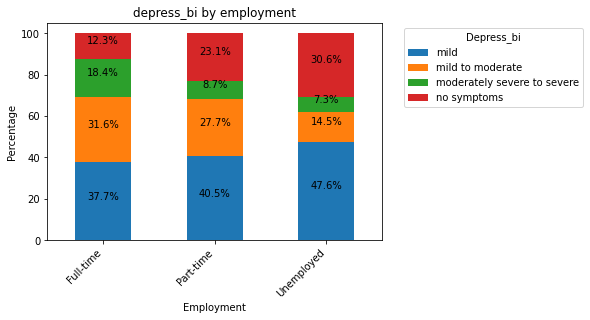

<Figure size 1440x1008 with 0 Axes>

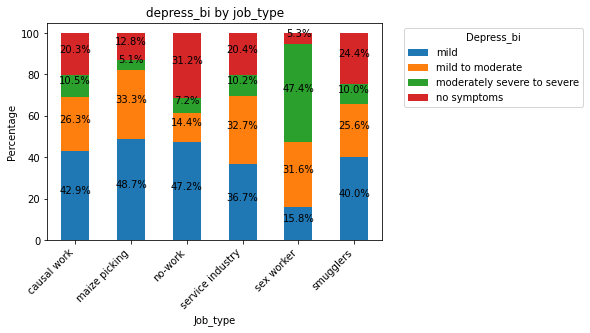

<Figure size 1440x1008 with 0 Axes>

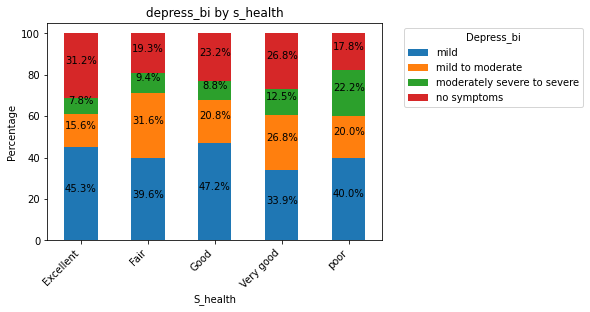

<Figure size 1440x1008 with 0 Axes>

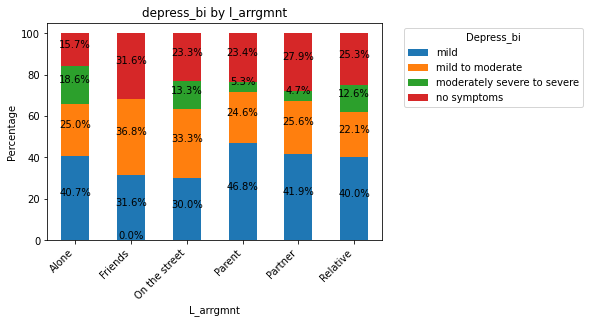

In [436]:
plot_percentage_by_category(df_2, 'employment', 'depress_bi')
plot_percentage_by_category(df_2, 'job_type', 'depress_bi')
plot_percentage_by_category(df_2, 's_health', 'depress_bi')
plot_percentage_by_category(df_2, 'l_arrgmnt', 'depress_bi')


<Figure size 1440x1008 with 0 Axes>

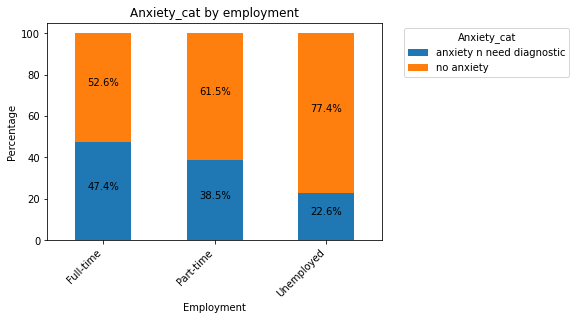

In [413]:
plot_percentage_by_category(df_1, 'employment', 'Anxiety_cat')


In [411]:
#obs:

-

## Particular (column & value) vs All values in that col

In [410]:
def plot_comparison(df, column_name, value_of_interest, target_column):
    # Filter the DataFrame for the specific value and calculate its counts
    value_counts = df[df[column_name] == value_of_interest][target_column].value_counts()
    value_percentages = value_counts / value_counts.sum() * 100
    
    # Calculate the counts and percentages for all other values in the column
    other_counts = df[df[column_name] != value_of_interest][target_column].value_counts()
    other_percentages = other_counts / other_counts.sum() * 100
    
    # Create a DataFrame to store the percentages
    percentages_df = pd.DataFrame({
        value_of_interest: value_percentages,
        'All Other Values': other_percentages
    })
    
    # Plotting the side-by-side bar chart
    ax = percentages_df.plot(kind='bar', figsize=(10, 6))
    plt.xlabel(target_column)
    plt.ylabel('Percentage')
    plt.title(f'Distribution of {target_column} by {column_name}: {value_of_interest} vs All Other Values')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=column_name)
    
    # Add percentage labels to each bar
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')
    
    plt.tight_layout()
    plt.show()


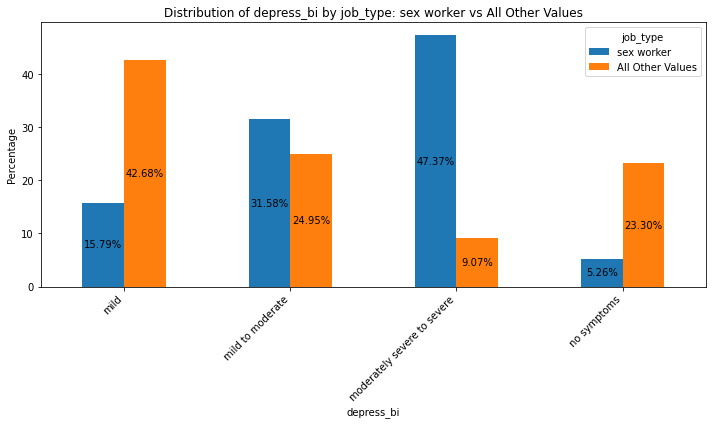

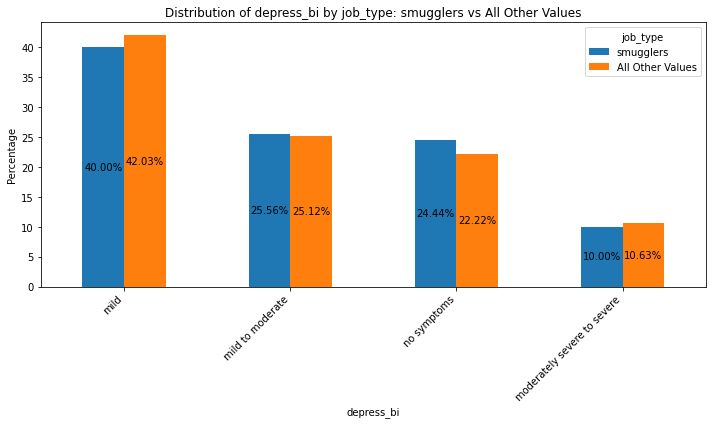

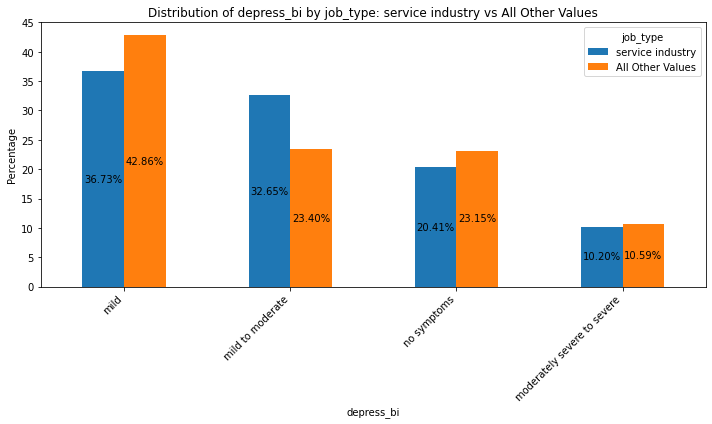

In [439]:
plot_comparison(df_2, 'job_type', 'sex worker', 'depress_bi')
plot_comparison(df_2, 'job_type', 'smugglers', 'depress_bi')
plot_comparison(df_2, 'job_type', 'service industry', 'depress_bi')


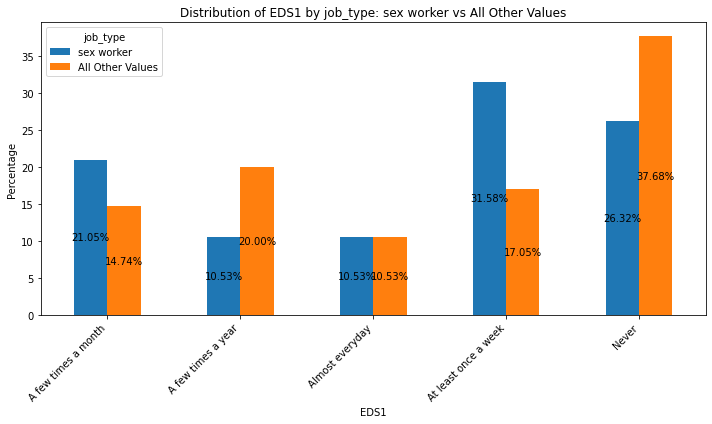

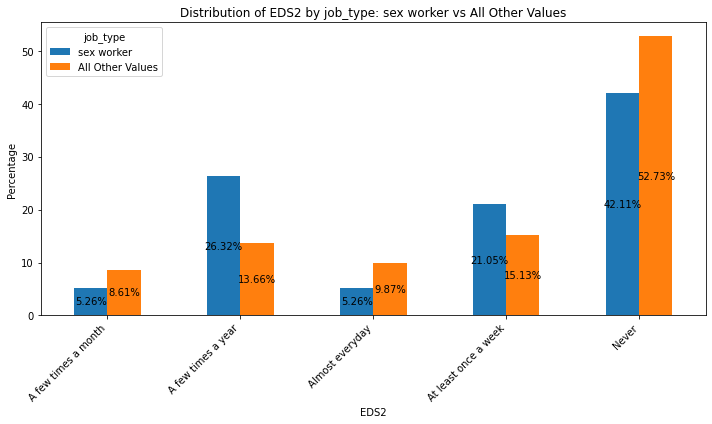

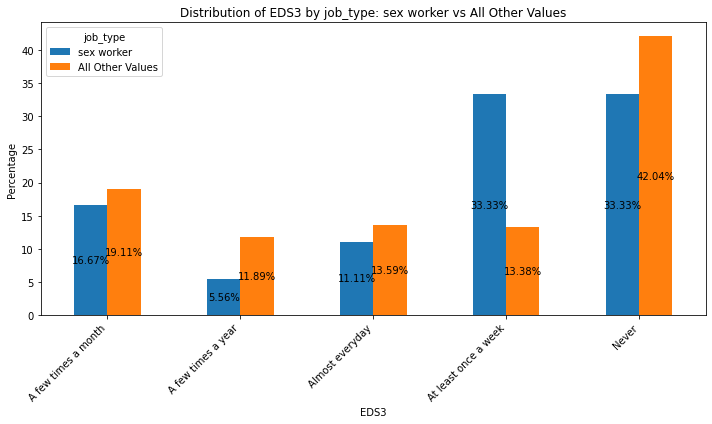

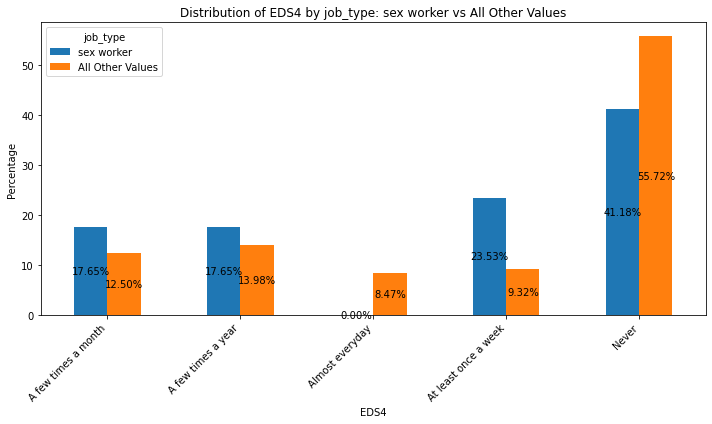

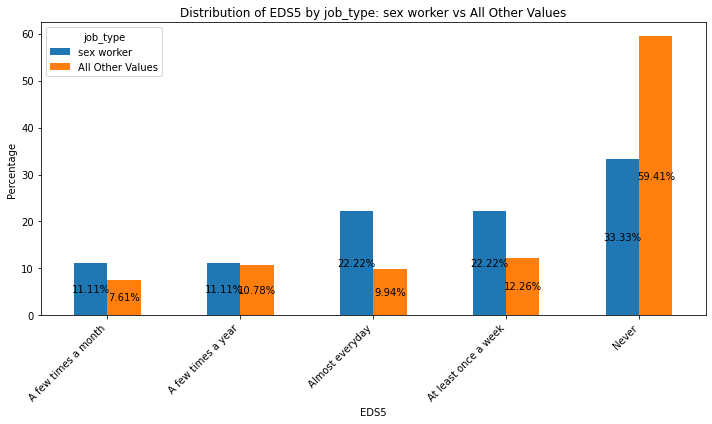

In [440]:
plot_comparison(df_2, 'job_type', 'sex worker', 'EDS1')
plot_comparison(df_2, 'job_type', 'sex worker', 'EDS2')
plot_comparison(df_2, 'job_type', 'sex worker', 'EDS3')
plot_comparison(df_2, 'job_type', 'sex worker', 'EDS4')
plot_comparison(df_2, 'job_type', 'sex worker', 'EDS5')





### Median-Splits

In [1]:
def plot_comparison_with_median(df, column_name, value_of_interest, target_column):
    # Filter the DataFrame for the specific value
    filtered_df = df[df[column_name] == value_of_interest]
    
    # Calculate the median of the target column
    target_median = filtered_df[target_column].median()
    
    # Split the data based on the median
    below_median = filtered_df[filtered_df[target_column] < target_median]
    above_median = filtered_df[filtered_df[target_column] >= target_median]
    
    # Calculate the counts and percentages for below median and above median
    below_median_counts = below_median[target_column].value_counts()
    below_median_percentages = below_median_counts / below_median_counts.sum() * 100
    
    above_median_counts = above_median[target_column].value_counts()
    above_median_percentages = above_median_counts / above_median_counts.sum() * 100
    
    # Calculate the counts and percentages for all other values in the column
    other_counts = df[df[column_name] != value_of_interest][target_column].value_counts()
    other_percentages = other_counts / other_counts.sum() * 100
    
    # Create DataFrames to store the percentages
    below_median_df = pd.DataFrame({
        f'Below Median ({target_median})': below_median_percentages,
        'All Other Values': other_percentages
    })
    
    above_median_df = pd.DataFrame({
        f'Above Median ({target_median})': above_median_percentages,
        'All Other Values': other_percentages
    })
    
    # Plotting the side-by-side bar charts
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    below_median_df.plot(kind='bar', ax=axes[0])
    axes[0].set_xlabel(target_column)
    axes[0].set_ylabel('Percentage')
    axes[0].set_title(f'Distribution of {target_column} by {column_name} ({value_of_interest}) - Below Median')
    axes[0].legend(title=column_name)
    
    above_median_df.plot(kind='bar', ax=axes[1])
    axes[1].set_xlabel(target_column)
    axes[1].set_ylabel('Percentage')
    axes[1].set_title(f'Distribution of {target_column} by {column_name} ({value_of_interest}) - Above Median')
    axes[1].legend(title=column_name)
    
    plt.tight_layout()
    plt.show()

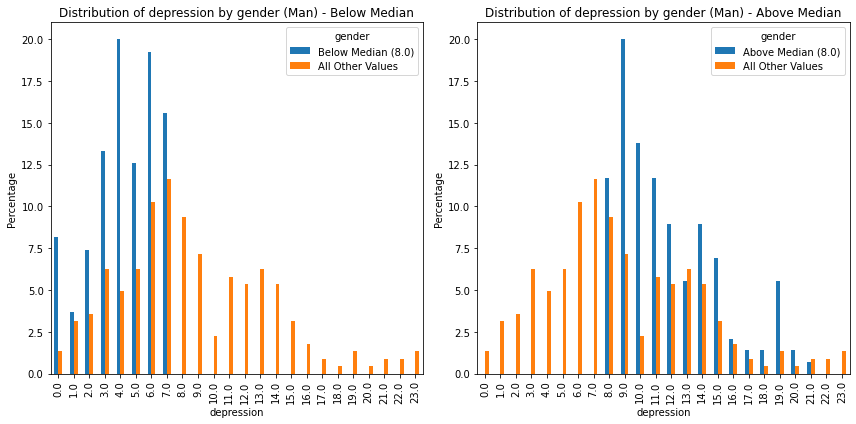

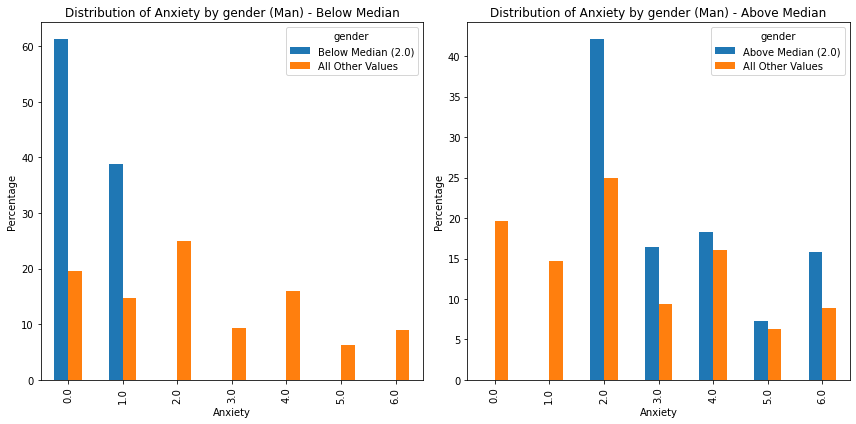

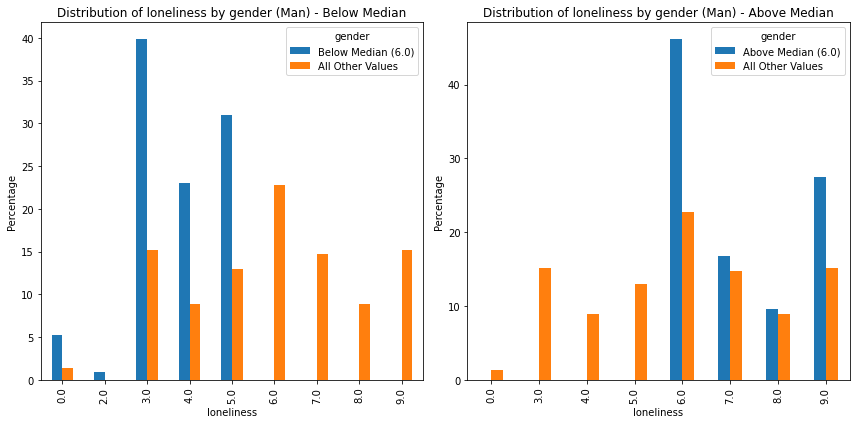

In [132]:
plot_comparison_with_median(df_2, 'gender', 'Man', 'depression')
plot_comparison_with_median(df_2, 'gender', 'Man', 'Anxiety')
plot_comparison_with_median(df_2, 'gender', 'Man', 'loneliness')



In [176]:
def median_split_violin_subplots(df, column_name, target_column):
    # Calculate the median of the target column
    median_value = df[target_column].median()
    
    # Create a new column 'Median Split' based on the median value
    df['Median Split'] = df[target_column].apply(lambda x: 'Above Median' if x > median_value else 'Below Median')

    # Get unique values in the specified column
    unique_values = df[column_name].unique()

    # Create subplots based on the number of unique values
    num_subplots = len(unique_values)
    fig, axs = plt.subplots(1, num_subplots, figsize=(18, 6), sharey=True)  # Set sharey=True for shared y-axis

    # Iterate through each unique value in the column
    for i, value in enumerate(unique_values):
        # Filter the DataFrame for the specific value of interest in the column
        filtered_df = df[df[column_name] == value]

        # Plotting the violin plot in the respective subplot
        ax = axs[i] if num_subplots > 1 else axs
        sns.violinplot(x='Median Split', y=target_column, hue='Median Split', data=filtered_df,
                       palette=['skyblue', 'lightgreen'], ax=ax, split=True, inner='quartile')
        #ax.set_xlabel('Median Split Category')
        ax.set_ylabel(target_column)
        ax.set_title(f'{target_column} for {value}')
        ax.legend([], [], frameon=False)  # Hide legend to avoid redundancy

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4)  # Adjust horizontal space between subplots
    plt.show()

In [60]:
def median_split_percentage(df, column_name, value_of_interest, target_column):
    # Calculate the median of the target column
    median_value = df[target_column].median()

    # Create a new column 'Median Split' based on the median value
    df['Median Split'] = df[target_column].apply(lambda x: 'Above Median' if x > median_value else 'Below Median')

    # Filter the DataFrame for the specific value of interest in the column
    filtered_df = df[df[column_name] == value_of_interest]

    # Group by the 'Median Split' column and calculate the percentage of the target column
    median_split_percentage = filtered_df.groupby('Median Split')[target_column].count() / len(filtered_df) * 100

    # Plotting the bar chart
    ax = median_split_percentage.plot(kind='bar', figsize=(8, 6), color=['blue', 'lightgreen'])
    plt.xlabel('Median Split Category')
    plt.ylabel('Percentage of ' + target_column)
    plt.title(f'Percentage of {target_column} for {value_of_interest} Below/Above Median')
    plt.xticks(rotation=0)
    
    # Adding percentage annotations to each bar
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height + 1), ha='center')

    plt.tight_layout()
    plt.show()


In [160]:
def median_split_percentage_subplots(df, column_name, target_column):
    # Calculate the median of the target column
    median_value = df[target_column].median()

    # Create a new column 'Median Split' based on the median value
    df['Median Split'] = df[target_column].apply(lambda x: 'Above Median' if x > median_value else 'Below Median')

    # Get unique values in the specified column
    unique_values = df[column_name].unique()
    
    print("Unique Values in Column:", unique_values)

    # Create subplots based on the number of unique values
    num_subplots = len(unique_values)
    fig, axs = plt.subplots(1, num_subplots, figsize=(18, 6), sharey=True)  # Set sharey=True for shared y-axis

    # Iterate through each unique value in the column
    for i, value in enumerate(unique_values):
        # Filter the DataFrame for the specific value of interest in the column
        filtered_df = df[df[column_name] == value]

        # Group by the 'Median Split' column and calculate the percentage of the target column
        median_split_percentage = filtered_df.groupby('Median Split')[target_column].count() / len(filtered_df) * 100

        # Plotting the bar chart in the respective subplot
        ax = axs[i] if num_subplots > 1 else axs
        median_split_percentage.plot(kind='bar', ax=ax, color=['blue', 'lightgreen'])
        #ax.set_xlabel('Median Split Category')
        ax.set_ylabel('Percentage of ' + target_column)
        ax.set_title(f' {target_column} for {value} ')
        ax.set_xticklabels(['Below Median', 'Above Median'], rotation=0)

        # Adding percentage annotations to each bar
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height:.2f}%', (x + width/2, y + height + 1), ha='center')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4)  # Adjust horizontal space between subplots
    plt.show()


### median-splits by Job-Types

Unique Values in Column: ['no-work' 'causal work' 'service industry' 'sex worker' 'maize picking'
 'smugglers']


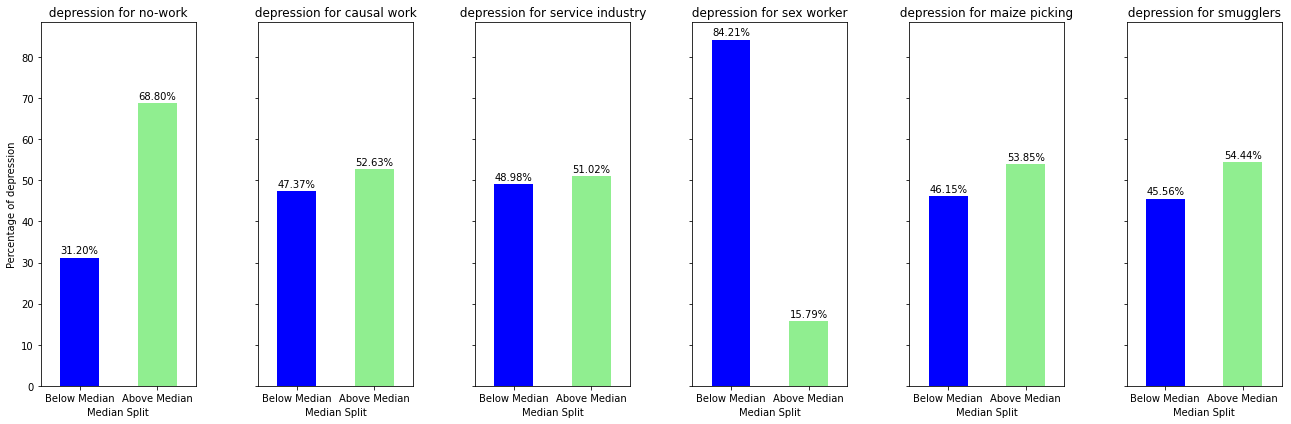

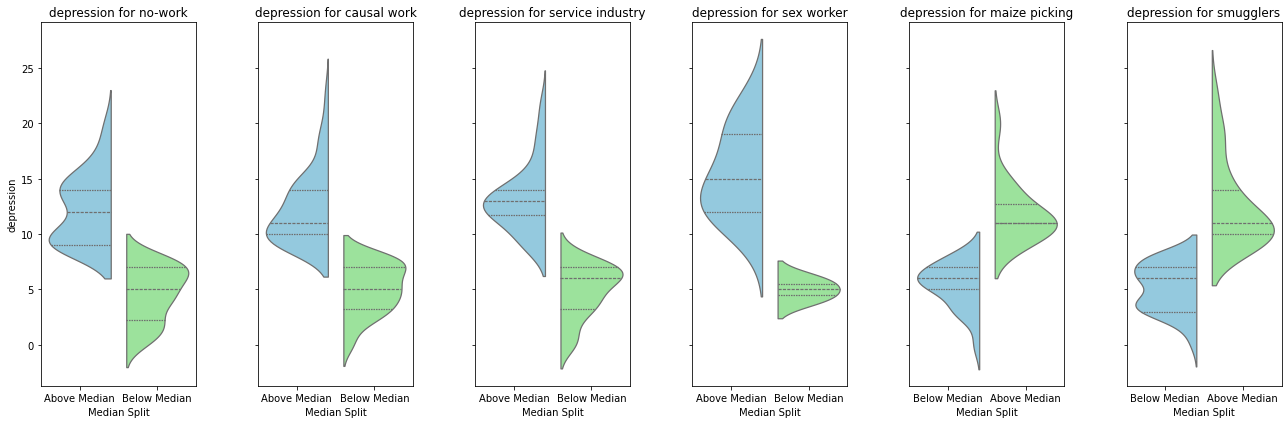

In [177]:
median_split_percentage_subplots(df_2, 'job_type', 'depression')
# median_split_percentage(df_2, 'job_type', 'sex worker', 'depression')
median_split_violin_subplots(df_2, 'job_type', 'depression')

Unique Values in Column: ['no-work' 'causal work' 'service industry' 'sex worker' 'maize picking'
 'smugglers']


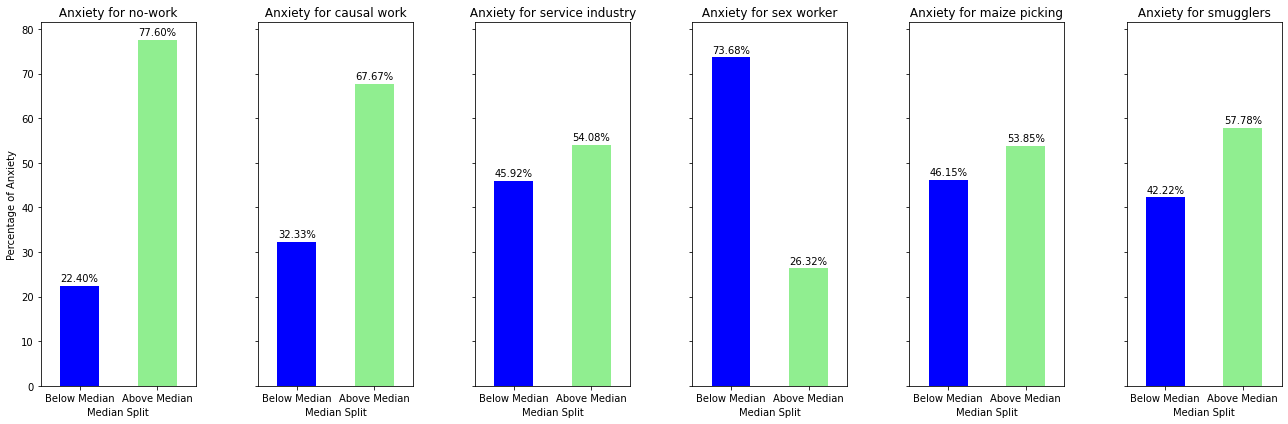

In [166]:
median_split_percentage_subplots(df_2, 'job_type', 'Anxiety')
# median_split_percentage(df_2, 'job_type', 'sex worker', 'Anxiety')
# median_split_violin_subplots(df_2, 'job_type', 'Anxiety')

Unique Values in Column: ['no-work' 'causal work' 'service industry' 'sex worker' 'maize picking'
 'smugglers']


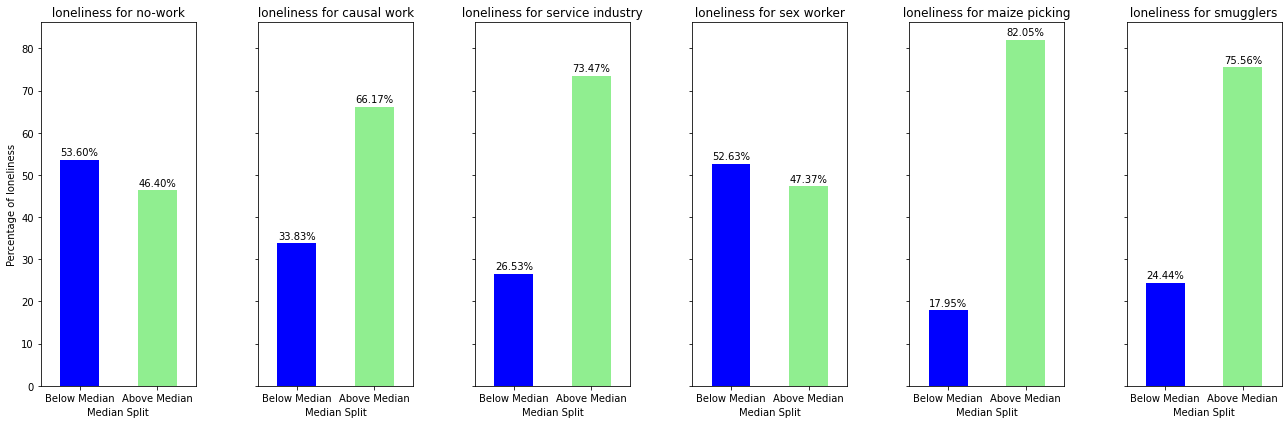

In [167]:
median_split_percentage_subplots(df_2, 'job_type', 'loneliness')

#### Observations

1. No-work: Depression & Anxiety is above median but loneliness is below median
2. Sex workers: All metrics below median
3. Service: High loneliness 
4. Maize: High loneliness
5. Smugglers: High loneliness
6. Causal work: High Anxiety & Loneliness

### Depression by Slum

Unique Values in Column: ['Mugugu' 'Nagwe' 'Sofia' 'Marachi']


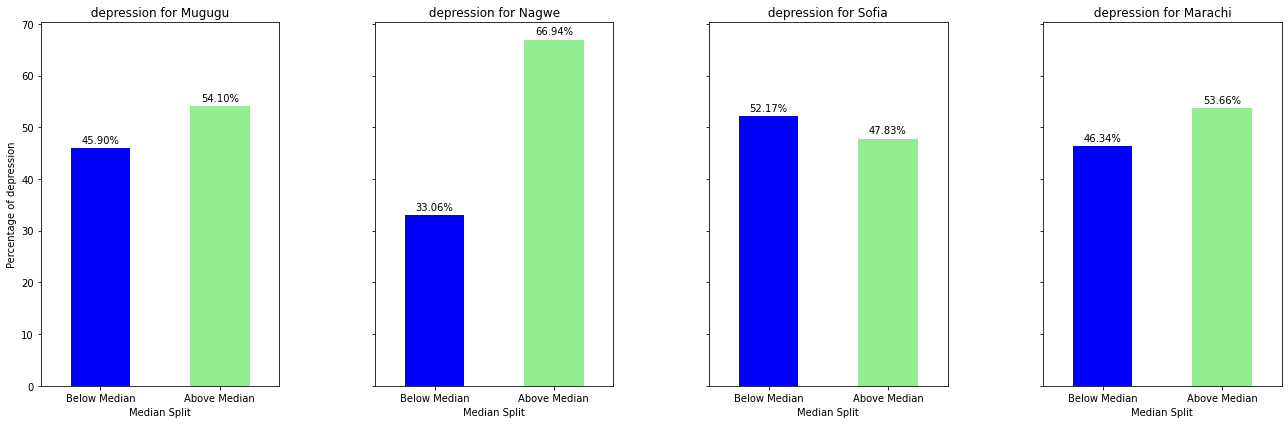

In [180]:
# median_split_percentage_subplots(df_2, 'gender', 'depression')
median_split_percentage_subplots(df_2, 'slums', 'depression')


### Anxiety by Slum


Unique Values in Column: ['Mugugu' 'Nagwe' 'Sofia' 'Marachi']


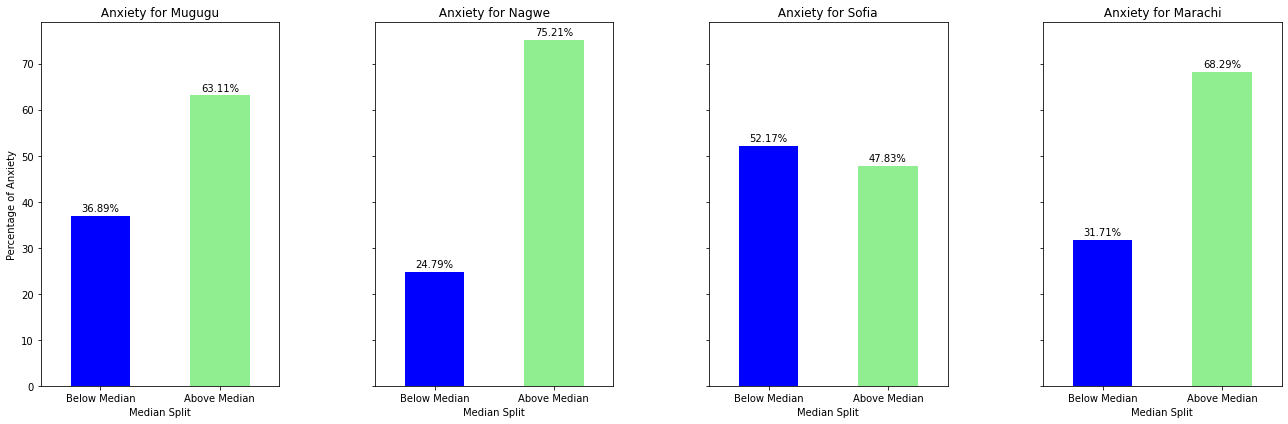

In [181]:
# median_split_percentage_subplots(df_2, 'gender', 'Anxiety')
median_split_percentage_subplots(df_2, 'slums', 'Anxiety')


### Loneliness by Slum


Unique Values in Column: ['Mugugu' 'Nagwe' 'Sofia' 'Marachi']


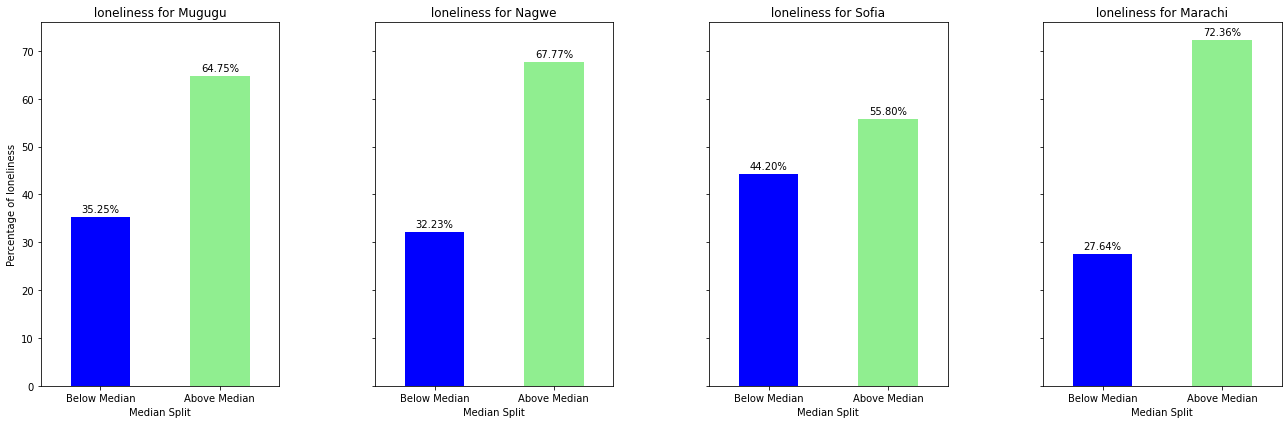

In [182]:
# median_split_percentage_subplots(df_2, 'gender', 'loneliness')
median_split_percentage_subplots(df_2, 'slums', 'loneliness')

### Other metal health variables by slum

Unique Values in Column: ['Mugugu' 'Nagwe' 'Sofia' 'Marachi']


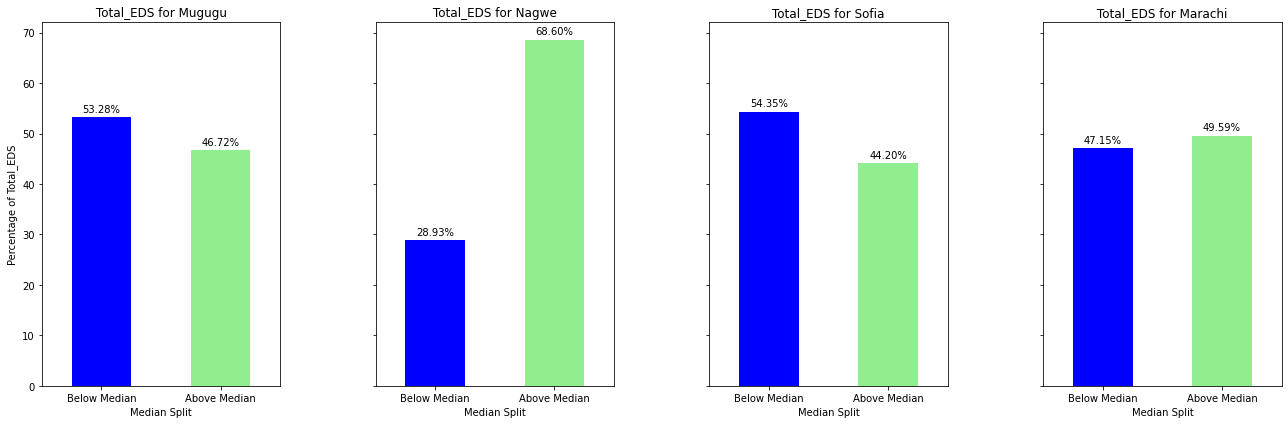

Unique Values in Column: ['Mugugu' 'Nagwe' 'Sofia' 'Marachi']


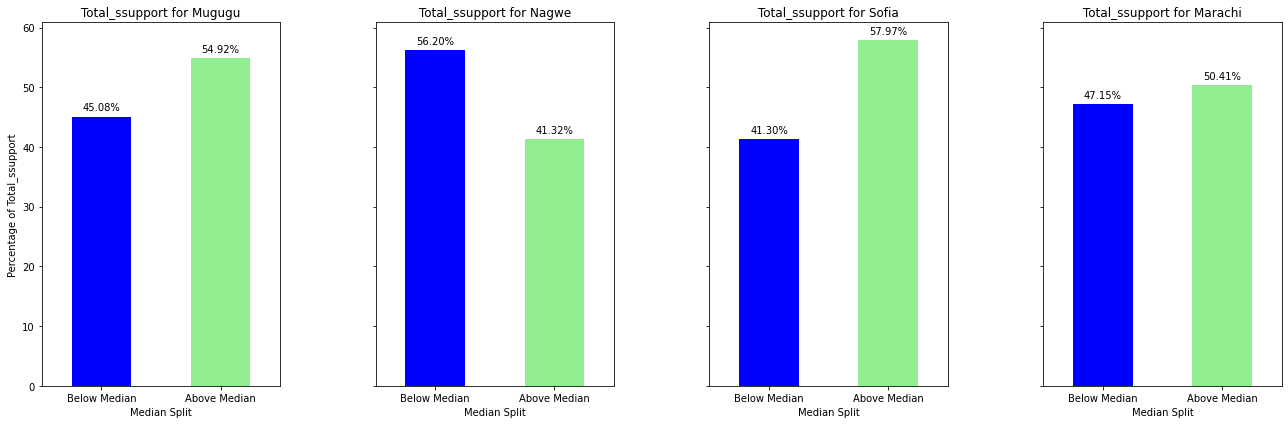

Unique Values in Column: ['Mugugu' 'Nagwe' 'Sofia' 'Marachi']


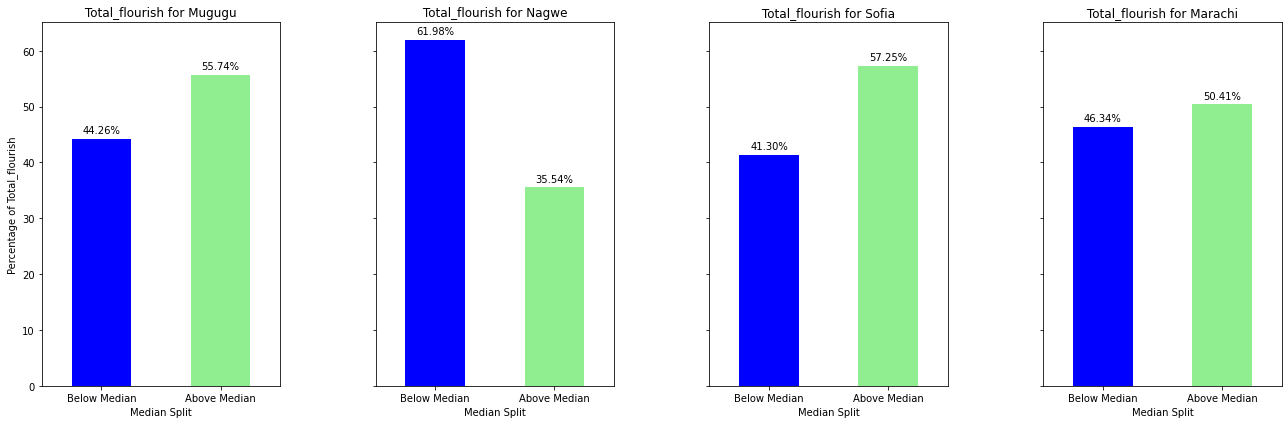

In [179]:
median_split_percentage_subplots(df_2, 'slums', 'Total_EDS')
median_split_percentage_subplots(df_2, 'slums', 'Total_ssupport')
median_split_percentage_subplots(df_2, 'slums', 'Total_flourish')

In [134]:
# Print descriptive statistics for specific columns in df_2
columns_of_interest = ['depression', 'Anxiety', 'loneliness']
print(df_2[columns_of_interest].describe())

       depression     Anxiety  loneliness
count  504.000000  504.000000  504.000000
mean     8.398810    2.265873    5.845238
std      4.779188    1.883471    2.097015
min      0.000000    0.000000    0.000000
25%      5.000000    1.000000    4.000000
50%      8.000000    2.000000    6.000000
75%     11.000000    4.000000    7.000000
max     23.000000    6.000000    9.000000


In [379]:
from scipy.stats import chi2_contingency
from dython.nominal import cramers_v


ModuleNotFoundError: No module named 'dython'

In [380]:
pip install dython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 23.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 32.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.7/248.7 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 16.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: psutil
    Found existing installation: psutil 5.8.0
    Uninstalling psutil-5.8.0:
      Successfully uninstalled psutil-5.8.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: matplotlib


# Finding association [Demographic vs 'X']

In [375]:
def chi_squared_test_individual(df, columns, target_column):
    results = []
    for column in columns:
        # Create a contingency table for each column
        contingency_table = pd.crosstab(index=df[target_column], columns=df[column])
        
        # Perform the chi-squared test for each column
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Determine if the column is correlated based on p-value
        is_correlated = 'is_corr' if p < 0.05 else 'is_not_corr'
        
        # Store the results
        results.append({'Column': column, 'P-value': p, 'Is Correlated': is_correlated})
    
    # Convert the results to a DataFrame for easier viewing
    results_df = pd.DataFrame(results)
    return results_df

In [448]:
columns_of_interest = ['slums', 'gender', 'age', 'agegroup', 'education', 'l_arrgmnt',
                       'employment', 'job_type', 'student_re', 'relations', 's_health',
                       'food_insecure', 'food_insecure_cat']

results_1 = chi_squared_test_individual(df_2, columns_of_interest, 'Anxiety_cat')
print(results_1)

               Column   P-value Is Correlated
0               slums  0.000043       is_corr
1              gender  0.145617   is_not_corr
2                 age  0.272829   is_not_corr
3            agegroup  0.091244   is_not_corr
4           education  0.055341   is_not_corr
5           l_arrgmnt  0.037540       is_corr
6          employment  0.000208       is_corr
7            job_type  0.000019       is_corr
8          student_re  0.000663       is_corr
9           relations  0.155541   is_not_corr
10           s_health  0.000043       is_corr
11      food_insecure  0.019330       is_corr
12  food_insecure_cat  0.132572   is_not_corr


In [449]:
columns_of_interest = ['slums', 'gender', 'age', 'agegroup', 'education', 'l_arrgmnt',
                       'employment', 'job_type', 'student_re', 'relations', 's_health',
                       'food_insecure', 'food_insecure_cat']

results_2 = chi_squared_test_individual(df_2, columns_of_interest, 'depress_bi')
print(results_2)

               Column   P-value Is Correlated
0               slums  0.000069       is_corr
1              gender  0.374821   is_not_corr
2                 age  0.003029       is_corr
3            agegroup  0.031782       is_corr
4           education  0.913263   is_not_corr
5           l_arrgmnt  0.035070       is_corr
6          employment  0.000122       is_corr
7            job_type  0.000011       is_corr
8          student_re  0.011736       is_corr
9           relations  0.260126   is_not_corr
10           s_health  0.057509   is_not_corr
11      food_insecure  0.459496   is_not_corr
12  food_insecure_cat  0.794791   is_not_corr


In [450]:
columns_of_interest = ['slums', 'gender', 'age', 'agegroup', 'education', 'l_arrgmnt',
                       'employment', 'job_type', 'student_re', 'relations', 's_health',
                       'food_insecure', 'food_insecure_cat']

results_3 = chi_squared_test_individual(df_2, columns_of_interest, 'lonely_cat')
print(results_3)

               Column       P-value Is Correlated
0               slums  5.234100e-01   is_not_corr
1              gender  8.049508e-01   is_not_corr
2                 age  7.841637e-01   is_not_corr
3            agegroup  2.374939e-01   is_not_corr
4           education  2.601109e-01   is_not_corr
5           l_arrgmnt  5.840149e-02   is_not_corr
6          employment  5.601652e-04       is_corr
7            job_type  2.233119e-03       is_corr
8          student_re  3.996555e-02       is_corr
9           relations  4.192975e-02       is_corr
10           s_health  7.263800e-09       is_corr
11      food_insecure  1.181455e-06       is_corr
12  food_insecure_cat  2.471728e-04       is_corr


In [451]:
columns_of_interest = ['hav_bank_savngs','hav_mobile_saving','hav_grp_savings','hav_home_savings','hav_someone_savings',
                      'recent_bank_savngs','recent_mobile_saving','hrecent_grp_savings','recent_home_savings','recent_someone_savings']

results = chi_squared_test_individual(df_2, columns_of_interest, 'depress_bi')
print(results)

                   Column   P-value Is Correlated
0         hav_bank_savngs  0.007387       is_corr
1       hav_mobile_saving  0.348286   is_not_corr
2         hav_grp_savings  0.271422   is_not_corr
3        hav_home_savings  0.351741   is_not_corr
4     hav_someone_savings  0.010108       is_corr
5      recent_bank_savngs  0.215668   is_not_corr
6    recent_mobile_saving  0.241068   is_not_corr
7     hrecent_grp_savings  0.143886   is_not_corr
8     recent_home_savings  0.612323   is_not_corr
9  recent_someone_savings  0.034726       is_corr


In [ ]:
'hav_bank_savngs' 'hav_mobile_saving' 'hav_grp_savings'	'hav_home_savings' 'hav_someone_savings','recent_bank_savngs','recent_mobile_saving','hrecent_grp_savings','recent_home_savings','recent_someone_savings'

In [454]:
columns_of_interest = ['slums', 'gender', 'age', 'agegroup', 'education', 'l_arrgmnt',
                       'employment', 'job_type', 'student_re', 'relations', 's_health',
                       'food_insecure', 'food_insecure_cat']

resultsz = chi_squared_test_individual(df_2, columns_of_interest, 'EDS1')
print(resultsz)

               Column       P-value Is Correlated
0               slums  1.275848e-04       is_corr
1              gender  4.009035e-02       is_corr
2                 age  8.579366e-01   is_not_corr
3            agegroup  5.581976e-01   is_not_corr
4           education  7.996279e-03       is_corr
5           l_arrgmnt  4.844692e-12       is_corr
6          employment  3.227738e-03       is_corr
7            job_type  5.379174e-03       is_corr
8          student_re  1.486303e-02       is_corr
9           relations  5.679468e-03       is_corr
10           s_health  8.533191e-08       is_corr
11      food_insecure  3.776133e-11       is_corr
12  food_insecure_cat  1.042627e-01   is_not_corr


In [455]:
results_4 = chi_squared_test_individual(df_2, columns_of_interest, 'EDS2')
print(results_4)
results_5 = chi_squared_test_individual(df_2, columns_of_interest, 'EDS3')
print(results_5)
results_6 = chi_squared_test_individual(df_2, columns_of_interest, 'EDS4')
print(results_6)
results_7 = chi_squared_test_individual(df_2, columns_of_interest, 'EDS5')
print(results_7)


               Column   P-value Is Correlated
0               slums  0.007724       is_corr
1              gender  0.002909       is_corr
2                 age  0.889750   is_not_corr
3            agegroup  0.961175   is_not_corr
4           education  0.073428   is_not_corr
5           l_arrgmnt  0.000002       is_corr
6          employment  0.003753       is_corr
7            job_type  0.000185       is_corr
8          student_re  0.020872       is_corr
9           relations  0.035384       is_corr
10           s_health  0.000053       is_corr
11      food_insecure  0.000361       is_corr
12  food_insecure_cat  0.024917       is_corr
               Column       P-value Is Correlated
0               slums  5.145774e-03       is_corr
1              gender  4.669160e-02       is_corr
2                 age  8.140826e-01   is_not_corr
3            agegroup  7.692921e-01   is_not_corr
4           education  3.836868e-02       is_corr
5           l_arrgmnt  7.189786e-06       is_corr
6     

## [Earlier code&plots]Distribution of Depression, Anxiety & Lonliness by demographic groups

In [139]:
# Rename the 'woman' column to 'gender'
df_1.rename(columns={'woman': 'gender'}, inplace=True)

In [459]:
# Calculate prevalence of depression by age group and gender
depression_prevalence = df_2.groupby(['agegroup', 'gender', 'job_type', 'severe_depress']).size().unstack(fill_value=0)
depression_prevalence['Total'] = depression_prevalence.sum(axis=1)
depression_prevalence['Depression (%)'] = (depression_prevalence['yes moderately severe to severe'] / depression_prevalence['Total']) * 100


# Format the output into a table
depression_table = depression_prevalence[['yes moderately severe to severe', 'no severe depression', 'Total', 'Depression (%)']]
depression_table.index.names = ['Age Group', 'Gender', 'Job Type']
depression_table.columns.names = ['Depression Category']

# Display the formatted table
print("Prevalence of Depression:")
print(depression_table)

Prevalence of Depression:
Depression Category                   yes moderately severe to severe  \
Age Group    Gender Job Type                                            
Adolescents  Man    causal work                                     4   
                    maize picking                                   0   
                    no-work                                         5   
                    service industry                                0   
                    smugglers                                       0   
             Woman  causal work                                     1   
                    maize picking                                   1   
                    no-work                                         2   
                    service industry                                3   
                    smugglers                                       1   
Young adults Man    causal work                                     9   
                    maize

In [460]:
# Calculate prevalence of anxiety by age group and gender
anxiety_prevalence = df_2.groupby(['agegroup', 'gender', 'job_type','Anxiety_cat']).size().unstack(fill_value=0)
anxiety_prevalence['Total'] = anxiety_prevalence.sum(axis=1)
anxiety_prevalence['Anxiety (%)'] = (anxiety_prevalence['anxiety n need diagnostic'] / anxiety_prevalence['Total']) * 100

# Format the output into a table
anxiety_table = anxiety_prevalence[['no anxiety', 'anxiety n need diagnostic', 'Total', 'Anxiety (%)']]
anxiety_table.index.names = ['Age Group', 'Gender', 'Job Type']
anxiety_table.columns.names = ['Anxiety Category']

# Display the formatted table
print("\nPrevalence of Anxiety:")
print(anxiety_table)


Prevalence of Anxiety:
Anxiety Category                      no anxiety  anxiety n need diagnostic  \
Age Group    Gender Job Type                                                  
Adolescents  Man    causal work               34                         18   
                    maize picking              1                          3   
                    no-work                   28                          8   
                    service industry          10                          1   
                    smugglers                 20                         15   
             Woman  causal work                8                          5   
                    maize picking              7                          5   
                    no-work                   23                          6   
                    service industry          20                         12   
                    smugglers                  5                          3   
Young adults Man    causal w

In [461]:
# Calculate prevalence of loneliness by age group and gender
loneliness_prevalence = df_2.groupby(['agegroup', 'gender', 'job_type', 'lonely_cat']).size().unstack(fill_value=0)
loneliness_prevalence['Total'] = loneliness_prevalence.sum(axis=1)
loneliness_prevalence['Loneliness (%)'] = (loneliness_prevalence['lonely'] / loneliness_prevalence['Total']) * 100

# Format the output into a table
loneliness_table = loneliness_prevalence[['lonely', 'not lonely', 'Total', 'Loneliness (%)']]
loneliness_table.index.names = ['Age Group', 'Gender', 'Job Type']
loneliness_table.columns.names = ['Loneliness Category']

# Display the formatted table
print("\nPrevalence of Loneliness:")
print(loneliness_table)


Prevalence of Loneliness:
Loneliness Category                   lonely  not lonely  Total  \
Age Group    Gender Job Type                                      
Adolescents  Man    causal work           30          21     51   
                    maize picking          3           1      4   
                    no-work               21          14     35   
                    service industry       5           6     11   
                    smugglers             21          13     34   
             Woman  causal work            7           6     13   
                    maize picking          5           6     11   
                    no-work               23           6     29   
                    service industry      16          15     31   
                    smugglers              2           6      8   
Young adults Man    causal work           33          21     54   
                    maize picking          3           3      6   
                    no-work        

## Depression: 
  - Young adult/ Women/ Sex-worker

## Anxiety:
  - Young adult/ Women/ Service- Industry
  - Young adult/ Women/ Sex-worker
 
## Loneliness:
  - Prevalent
       

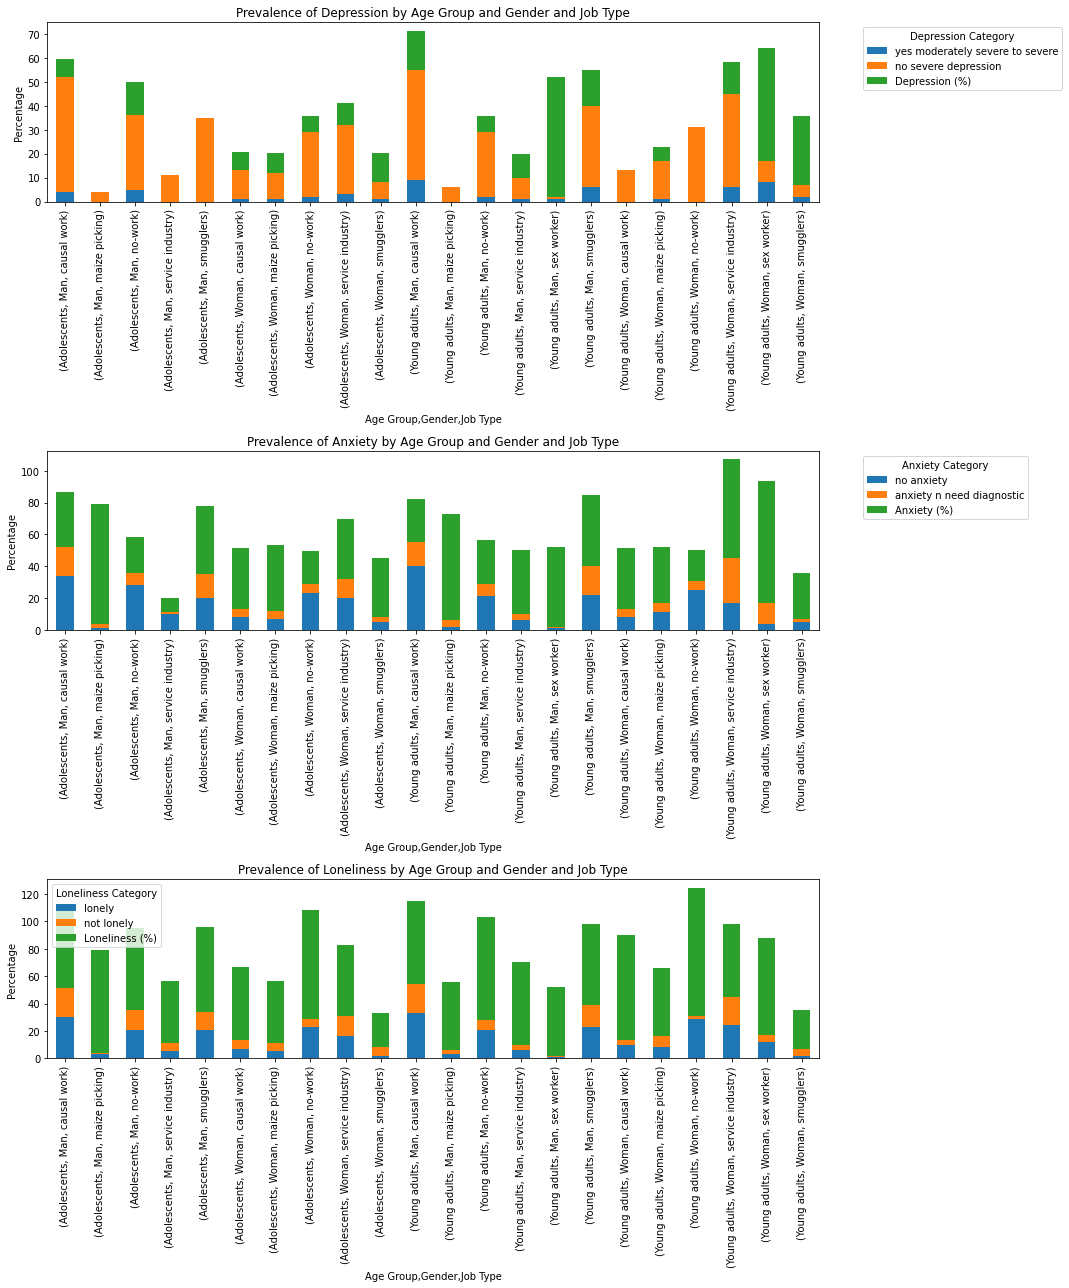

In [462]:
# Set up the figure and axes for plotting
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# Plot the bar chart for depression
ax = depression_prevalence[['yes moderately severe to severe', 'no severe depression', 'Depression (%)']].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Prevalence of Depression by Age Group and Gender and Job Type')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Depression Category', bbox_to_anchor=(1.05, 1), loc='upper left')


# Plot the bar chart for anxiety
anxiety_prevalence[['no anxiety', 'anxiety n need diagnostic', 'Anxiety (%)']].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Prevalence of Anxiety by Age Group and Gender and Job Type')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Anxiety Category', bbox_to_anchor=(1.05, 1), loc='upper left' )


# Plot the bar chart for loneliness
loneliness_prevalence[['lonely', 'not lonely', 'Loneliness (%)']].plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Prevalence of Loneliness by Age Group and Gender and Job Type')
axes[2].set_ylabel('Percentage')
axes[2].legend(title='Loneliness Category',  )



plt.tight_layout()
plt.show()

## Discrimination Q

1. I am treated with less courtesy or respect than other people.
2. I receive poorer service than other people at restaurants or stores.
3. People act as if they think I am not smart.
4. People act as if they are afraid of me.
5. I am threatened or harassed

## Correlation 

In [199]:
# Select mental health and economic columns
mental_health = ['depression', 'Anxiety', 'loneliness', 'Total_ssupport', 'Total_flourish', 'Total_EDS']  # Replace with your column names
economic = ['e_resources', 'AF_Resources', 's_capitals']  # Replace with your column names

# Calculate correlations
correlations = df_1[mental_health + economic].corr(method='pearson')  
print(correlations)

                depression   Anxiety  loneliness  Total_ssupport  \
depression        1.000000  0.468788    0.129013       -0.103659   
Anxiety           0.468788  1.000000    0.128040       -0.185844   
loneliness        0.129013  0.128040    1.000000       -0.208790   
Total_ssupport   -0.103659 -0.185844   -0.208790        1.000000   
Total_flourish   -0.257001 -0.327370   -0.124068        0.603166   
Total_EDS         0.224155  0.312137    0.194416       -0.394766   
e_resources      -0.047467 -0.221671    0.078671        0.241653   
AF_Resources      0.096678  0.142152   -0.049515        0.072638   
s_capitals       -0.033556 -0.189887   -0.197387        0.465107   

                Total_flourish  Total_EDS  e_resources  AF_Resources  \
depression           -0.257001   0.224155    -0.047467      0.096678   
Anxiety              -0.327370   0.312137    -0.221671      0.142152   
loneliness           -0.124068   0.194416     0.078671     -0.049515   
Total_ssupport        0.603166 

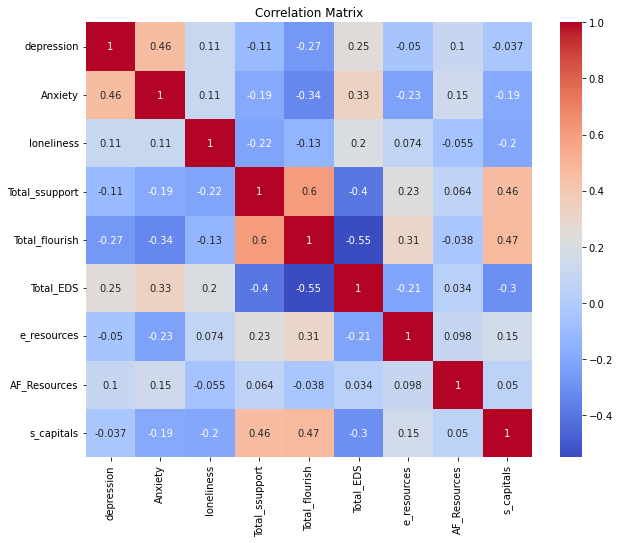

In [444]:
# Select the columns you want to analyze (mental health, economic, etc.)
selected_columns = ['depression', 'Anxiety', 'loneliness', 'Total_ssupport', 'Total_flourish', 'Total_EDS','e_resources', 'AF_Resources', 's_capitals' ]  # Replace with your desired columns

# Calculate the correlation matrix
correlation_matrix = df_2[selected_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # 'annot=True' displays correlation values

# Customize the plot (optional)
plt.title('Correlation Matrix')
plt.show()

In [445]:
#Correlation With Value (most correlated with positive)
pd.DataFrame(correlation_matrix["depression"]).sort_values("depression", ascending=False).head(10)

,depression
depression,1.000000
Anxiety,0.458410
Total_EDS,0.248081
loneliness,0.106348
AF_Resources,0.102892
s_capitals,-0.037004
e_resources,-0.050277
Total_ssupport,-0.107531
Total_flourish,-0.271969


In [446]:
#Correlation With Value (most correlated with positive)
pd.DataFrame(correlation_matrix["Anxiety"]).sort_values("Anxiety", ascending=False).head(10)

,Anxiety
Anxiety,1.000000
depression,0.458410
Total_EDS,0.331560
AF_Resources,0.145107
loneliness,0.108089
Total_ssupport,-0.191125
s_capitals,-0.191817
e_resources,-0.225217
Total_flourish,-0.335119


In [207]:
# Get value counts for each column related to savings
savings_cols = ['hav_bank_savngs', 'hav_mobile_saving', 'hav_grp_savings', 'hav_home_savings', 'hav_someone_savings',
                'recent_bank_savngs', 'recent_mobile_saving', 'hrecent_grp_savings', 'recent_home_savings', 'recent_someone_savings']

for col in savings_cols:
  print(f"\nValue Counts for {col}:")
  print(df_1[col].value_counts())


Value Counts for hav_bank_savngs:
no     481
yes     17
Name: hav_bank_savngs, dtype: int64

Value Counts for hav_mobile_saving:
no     352
yes    146
Name: hav_mobile_saving, dtype: int64

Value Counts for hav_grp_savings:
no     297
yes    192
Name: hav_grp_savings, dtype: int64

Value Counts for hav_home_savings:
no     252
yes    240
Name: hav_home_savings, dtype: int64

Value Counts for hav_someone_savings:
no     351
yes    147
Name: hav_someone_savings, dtype: int64

Value Counts for recent_bank_savngs:
no     465
yes     15
Name: recent_bank_savngs, dtype: int64

Value Counts for recent_mobile_saving:
no     364
yes    120
Name: recent_mobile_saving, dtype: int64

Value Counts for hrecent_grp_savings:
no     292
yes    177
Name: hrecent_grp_savings, dtype: int64

Value Counts for recent_home_savings:
no     257
yes    226
Name: recent_home_savings, dtype: int64

Value Counts for recent_someone_savings:
no     349
yes    137
Name: recent_someone_savings, dtype: int64


- How should we deal with the inconsistency in the data? 

In [296]:
# Assuming df_1 is your DataFrame
columns_of_interest = [
    'hav_bank_savngs', 'hav_mobile_saving', 'hav_grp_savings', 'hav_home_savings', 'hav_someone_savings',
    'recent_bank_savngs', 'recent_mobile_saving', 'hrecent_grp_savings', 'recent_home_savings', 'recent_someone_savings',
    'depress_bi'  # Adding depress_bi for correlation calculation
]

# Select the columns of interest
subset_df = df_1[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print(correlation_matrix)



Empty DataFrame
Columns: []
Index: []


## Overall money activity with Mental health indicators 

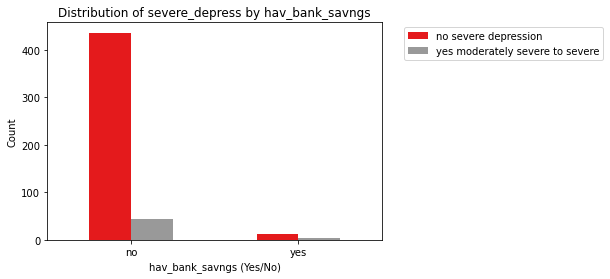

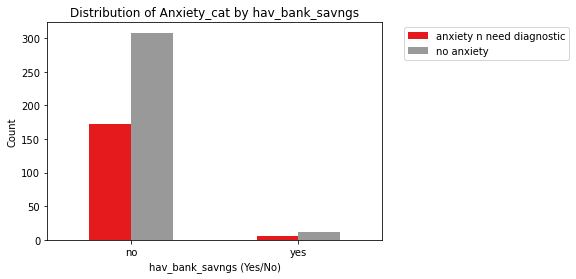

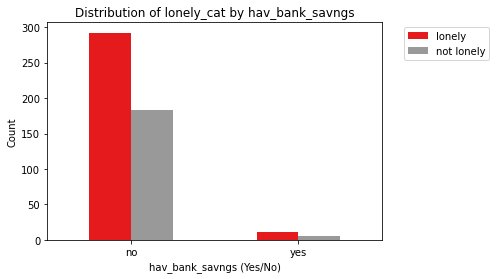

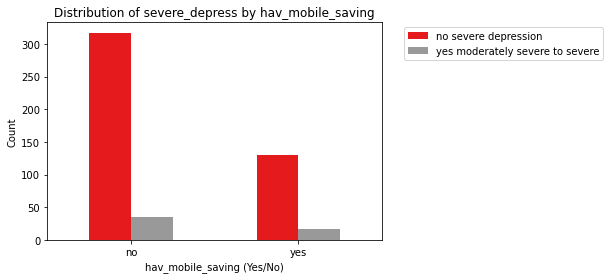

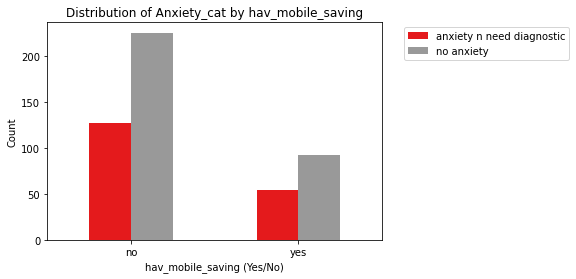

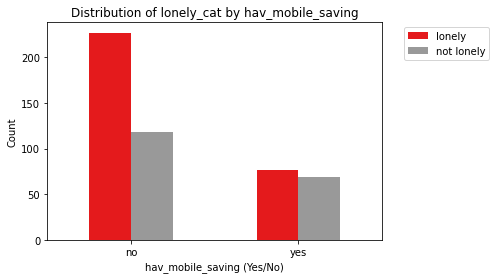

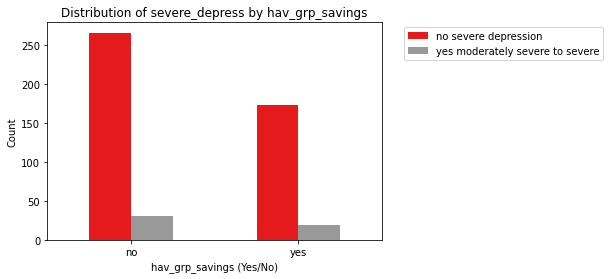

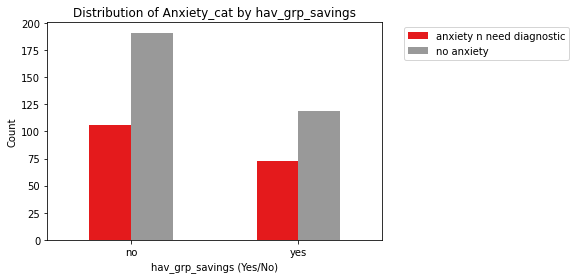

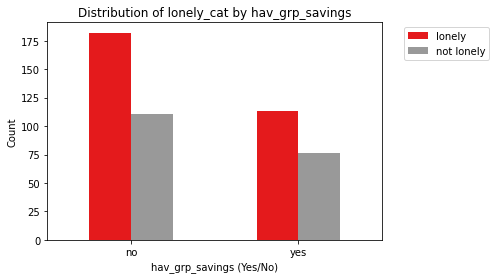

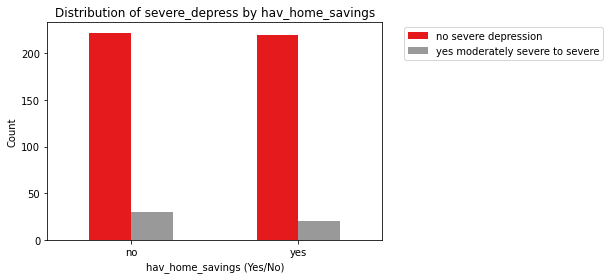

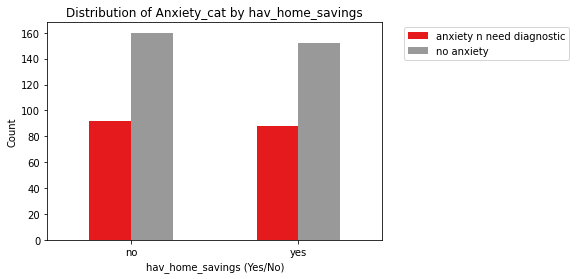

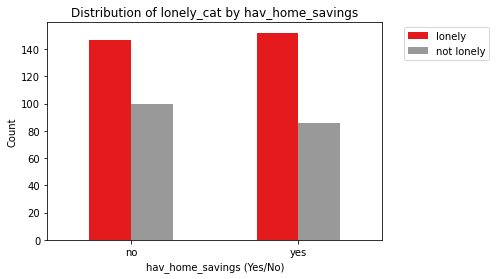

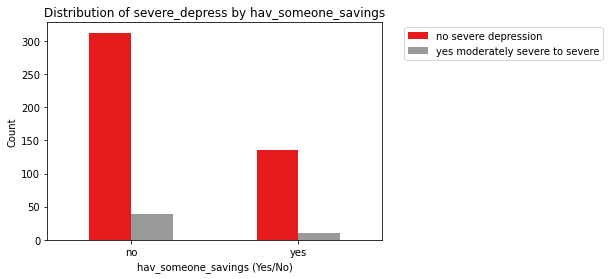

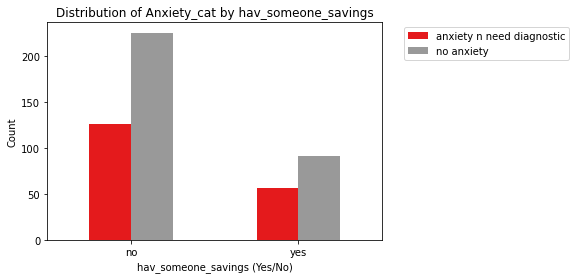

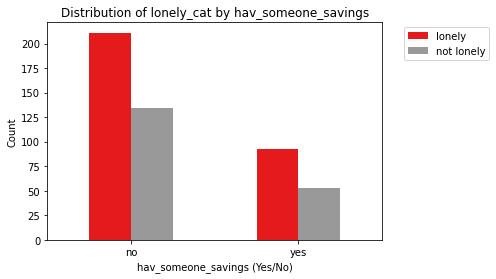

In [212]:
# Economic factors and mental health indicators lists (assuming binary values)
economic_cols = ['hav_bank_savngs', 'hav_mobile_saving', 'hav_grp_savings', 'hav_home_savings', 'hav_someone_savings']
mental_health_cols = ['severe_depress', 'Anxiety_cat', 'lonely_cat']

# Loop through economic factors and mental health indicators
for eco_col in economic_cols:
  for mh_col in mental_health_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df_1[eco_col], df_1[mh_col])

    # Create a bar chart
    contingency_table.plot(kind='bar', stacked=False, colormap='Set1')
    plt.xlabel(f'{eco_col} (Yes/No)')  # Label x-axis with full column name
    plt.ylabel('Count')
    plt.title(f'Distribution of {mh_col} by {eco_col}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)  # Rotate x-axis labels to prevent overlapping
    plt.show()

## Recent money activity with Mental health indicators

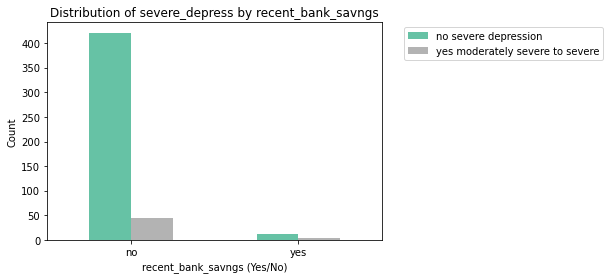

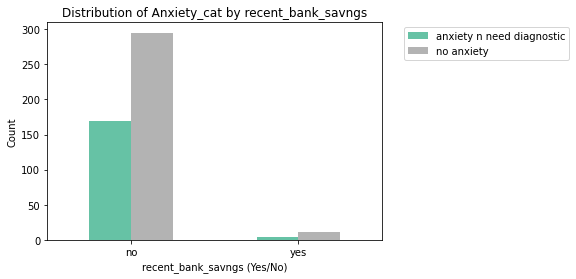

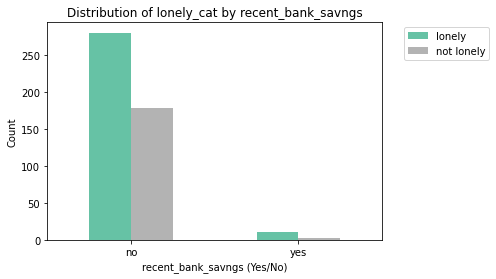

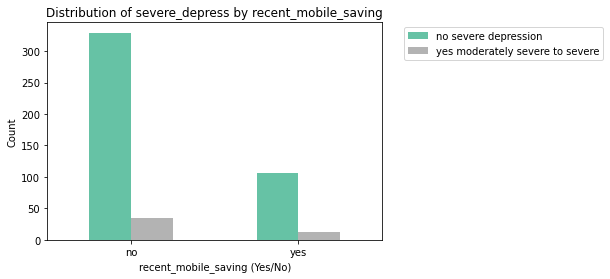

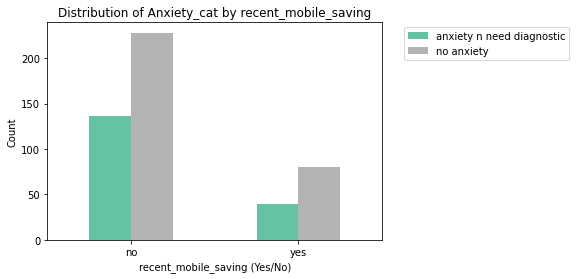

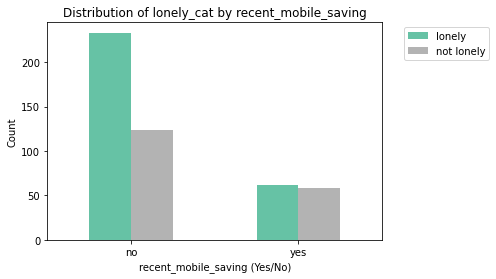

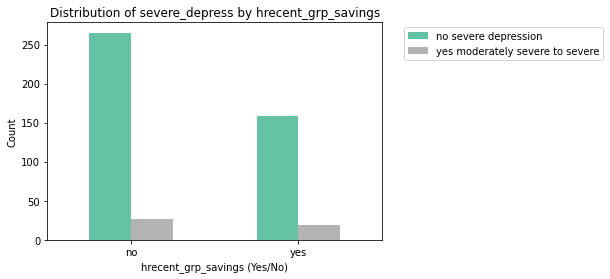

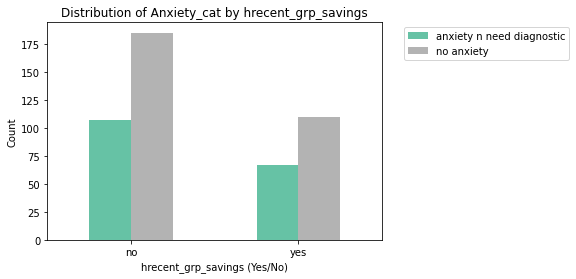

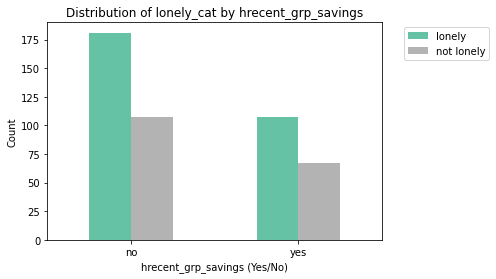

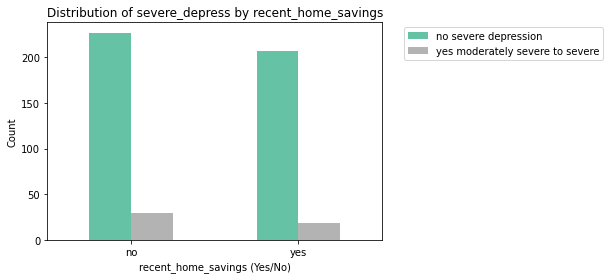

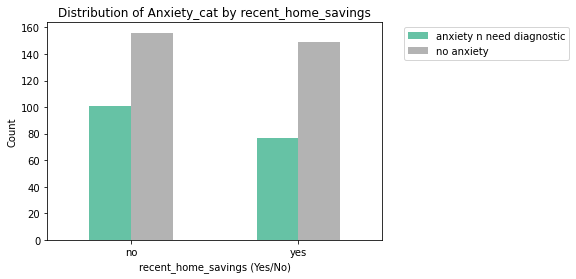

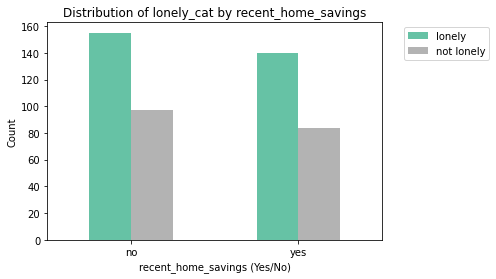

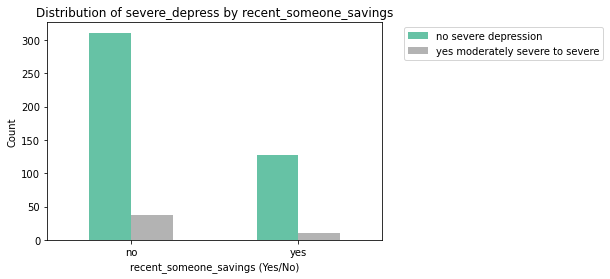

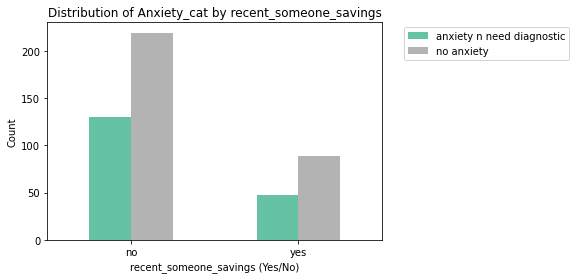

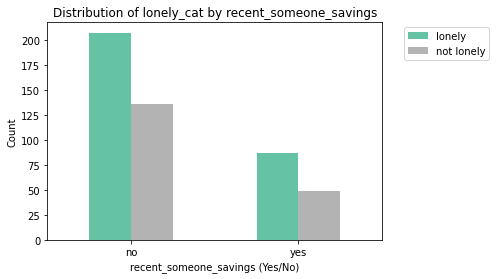

In [216]:
# Economic factors and mental health indicators lists (assuming binary values)
economic_cols = ['recent_bank_savngs', 'recent_mobile_saving', 'hrecent_grp_savings', 'recent_home_savings', 'recent_someone_savings']
mental_health_cols = ['severe_depress', 'Anxiety_cat', 'lonely_cat']

# Loop through economic factors and mental health indicators
for eco_col in economic_cols:
  for mh_col in mental_health_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df_1[eco_col], df_1[mh_col])

    # Create a bar chart
    contingency_table.plot(kind='bar', stacked=False, colormap='Set2')
    plt.xlabel(f'{eco_col} (Yes/No)')  # Label x-axis with full column name
    plt.ylabel('Count')
    plt.title(f'Distribution of {mh_col} by {eco_col}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)  # Rotate x-axis labels to prevent overlapping
    plt.show()